In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)

# Data Preprocessing

## Table descriptions
- **inpatient:** claim in which the patient is hospitalized meaning that he will undergo treatment and spend the night or more in the hospital
- **outpatient:** claim in which the patient is at the hospital for treatment and then leaves
- **beneficiary:** the person that is recieving the treatment for the service
- **provider:** the inusrance providors and if the are potentially fraudulent

In [2]:
PATH = 'dataset/' 

df_inpatient = pd.read_csv(PATH + 'Train_Inpatientdata.csv')
df_outpatient = pd.read_csv(PATH + 'Train_Outpatientdata.csv')
df_beneficiary = pd.read_csv(PATH + 'Train_Beneficiarydata.csv')
df_provider = pd.read_csv(PATH + 'Train.csv')

In [3]:
df_inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df_outpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [5]:
df_beneficiary.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50


In [6]:
df_provider.head(2)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


## Adding/Modifying columns to each table

### inpatient
- add column DaysHospitilized
- add column isAdmitted
- add column ClaimDaysOpen

In [7]:
#add the varaible DaysHopitilized

# Ensure 'AdmissionDt' and 'DischargeDt' columns are in datetime format
df_inpatient['AdmissionDt'] = pd.to_datetime(df_inpatient['AdmissionDt'], errors='coerce')
df_inpatient['DischargeDt'] = pd.to_datetime(df_inpatient['DischargeDt'], errors='coerce')

# Create the 'DaysHospitalized' column, adding 1 day to ensure at least one day of hospitalization
df_inpatient['DaysHospitalized'] = ((df_inpatient['DischargeDt'] - df_inpatient['AdmissionDt']).dt.days) + 1

# Display the updated DataFrame
df_inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DaysHospitalized
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,3


In [8]:
df_inpatient['isAdmitted'] = 1
df_inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DaysHospitalized,isAdmitted
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,3,1


In [9]:
#add the varaible ClaimDaysOpen

# Ensure 'AdmissionDt' and 'DischargeDt' columns are in datetime format
df_inpatient['ClaimStartDt'] = pd.to_datetime(df_inpatient['ClaimStartDt'], errors='coerce')
df_inpatient['ClaimEndDt'] = pd.to_datetime(df_inpatient['ClaimEndDt'], errors='coerce')

# Create the 'DaysHospitalized' column, adding 1 day to ensure at least one day of hospitalization
df_inpatient['ClaimDaysOpen'] = ((df_inpatient['ClaimEndDt'] - df_inpatient['ClaimStartDt']).dt.days) + 1

# Display the updated DataFrame
df_inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DaysHospitalized,isAdmitted,ClaimDaysOpen
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1,7
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,3,1,3


### outpatient
- add column DaysHospitilized
- add column isAdmitted
- add column ClaimDays

In [10]:
df_outpatient['DaysHospitalized'] = 0
df_outpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,DaysHospitalized
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,0


In [11]:
df_outpatient['isAdmitted'] = 0
df_outpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,DaysHospitalized,isAdmitted
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,0,0


In [12]:
#add the varaible ClaimDaysOpen

# Ensure 'AdmissionDt' and 'DischargeDt' columns are in datetime format
df_outpatient['ClaimStartDt'] = pd.to_datetime(df_outpatient['ClaimStartDt'], errors='coerce')
df_outpatient['ClaimEndDt'] = pd.to_datetime(df_outpatient['ClaimEndDt'], errors='coerce')

# Create the 'DaysHospitalized' column, adding 1 day to ensure at least one day of hospitalization
df_outpatient['ClaimDaysOpen'] = ((df_outpatient['ClaimEndDt'] - df_outpatient['ClaimStartDt']).dt.days) + 1

# Display the updated DataFrame
df_outpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,DaysHospitalized,isAdmitted,ClaimDaysOpen
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0,0,1
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,0,0,1


### beneficiary
- Add the binary column IsDead
- Add the binanry column Age
- Change entries of Chronic conditions from (1-2) to (1-0)
- Change entries of Renal Disease Indicator from (0-Y) to (0-1)

In [13]:
#add the binary variable isDead to beneficiary
df_beneficiary['IsDead'] = df_beneficiary['DOD'].apply(lambda x: 1 if pd.notna(x) else 0)

df_beneficiary.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,IsDead
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,0
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,0


In [14]:
#add the varaible Age

## As we see that last DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009.
## so we will calculate age of other benficiaries for year 2009

df_beneficiary['DOB'] = pd.to_datetime(df_beneficiary['DOB'], errors='coerce')
df_beneficiary['DOD'] = pd.to_datetime(df_beneficiary['DOD'], errors='coerce')

# Define the reference date for living people (2009-12-01)
fallback_date = pd.to_datetime('2009-12-01')
df_beneficiary['DOD'] = df_beneficiary['DOD'].fillna(fallback_date)

# Calculate age in years
df_beneficiary['Age'] = (df_beneficiary['DOD'] - df_beneficiary['DOB']).dt.days // 365

print(f"min: {df_beneficiary['Age'].min()}")
print(f"max: {df_beneficiary['Age'].max()}")

min: 26
max: 100


In [15]:
# Changing the entires in Chronic Cond from 2 to 0. This way the dataset is more intuitive
df_beneficiary['ChronicCond_Alzheimer'] = df_beneficiary['ChronicCond_Alzheimer'].replace(2, 0)
df_beneficiary['ChronicCond_Heartfailure'] = df_beneficiary['ChronicCond_Heartfailure'].replace(2, 0)
df_beneficiary['ChronicCond_KidneyDisease'] = df_beneficiary['ChronicCond_KidneyDisease'].replace(2, 0)
df_beneficiary['ChronicCond_Cancer'] = df_beneficiary['ChronicCond_Cancer'].replace(2, 0)
df_beneficiary['ChronicCond_ObstrPulmonary'] = df_beneficiary['ChronicCond_ObstrPulmonary'].replace(2, 0)
df_beneficiary['ChronicCond_Depression'] = df_beneficiary['ChronicCond_Depression'].replace(2, 0)
df_beneficiary['ChronicCond_Diabetes'] = df_beneficiary['ChronicCond_Diabetes'].replace(2, 0)
df_beneficiary['ChronicCond_IschemicHeart'] = df_beneficiary['ChronicCond_IschemicHeart'].replace(2, 0)
df_beneficiary['ChronicCond_Osteoporasis'] = df_beneficiary['ChronicCond_Osteoporasis'].replace(2, 0)
df_beneficiary['ChronicCond_rheumatoidarthritis'] = df_beneficiary['ChronicCond_rheumatoidarthritis'].replace(2, 0)
df_beneficiary['ChronicCond_stroke'] = df_beneficiary['ChronicCond_stroke'].replace(2, 0)

df_beneficiary.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,IsDead,Age
0,BENE11001,1943-01-01,2009-12-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,66
1,BENE11002,1936-09-01,2009-12-01,2,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,0,73


In [16]:
df_beneficiary['RenalDiseaseIndicator'] = df_beneficiary['RenalDiseaseIndicator'].replace('Y', 1)
df_beneficiary['RenalDiseaseIndicator'] = df_beneficiary['RenalDiseaseIndicator'].astype('int64')
df_beneficiary['RenalDiseaseIndicator'].unique()

array([0, 1], dtype=int64)

### Provider
- Change column 'PotentialFraud' from yes/no to 1/0

In [17]:
df_provider['PotentialFraud'] = df_provider['PotentialFraud'].replace("No", 0).replace("Yes", 1).astype(int)
df_provider.head(2)

C:\Users\sligh\AppData\Local\Temp\ipykernel_13836\3635196831.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_provider['PotentialFraud'] = df_provider['PotentialFraud'].replace("No", 0).replace("Yes", 1).astype(int)


,Provider,PotentialFraud
0,PRV51001,0
1,PRV51003,1


## Merging datasets into one dataset

In [18]:
# Merge df_inpatient with df_provider on 'Provider'
df_inpatient_merged = pd.merge(df_inpatient, df_provider, how='inner', left_on='Provider', right_on='Provider')

# Merge df_outpatient with df_provider on 'Provider'
df_outpatient_merged = pd.merge(df_outpatient, df_provider, how='inner', left_on='Provider', right_on='Provider')

# Combine the two merged tables
df_train = pd.concat([df_inpatient_merged, df_outpatient_merged], ignore_index=True)

In [19]:
df_train = pd.merge(df_train, df_beneficiary, how='inner', left_on='BeneID', right_on='BeneID')
df_train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DaysHospitalized,isAdmitted,ClaimDaysOpen,PotentialFraud,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,IsDead,Age
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1,7,1,1943-01-01,2009-12-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,66
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,3,1,3,0,1943-01-01,2009-12-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,66


In [20]:
first_columns = ['Provider', 'ClaimID', 'BeneID', 'PotentialFraud', 'isAdmitted', 'ClaimStartDt', 'ClaimEndDt', 'ClaimDaysOpen', 'AdmissionDt', 'DischargeDt', 'DaysHospitalized']
remaining_columns = [col for col in df_train.columns if col not in first_columns]

# Reorder the columns
df_train = df_train[first_columns + remaining_columns]

# Save the reordered dataset to a new CSV file (optional)
df_train.to_csv('reordered_train_dataset.csv', index=False)

# Display the first few rows of the reordered dataset
df_train.head(2)

,Provider,ClaimID,BeneID,PotentialFraud,isAdmitted,ClaimStartDt,ClaimEndDt,ClaimDaysOpen,AdmissionDt,DischargeDt,DaysHospitalized,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,IsDead,Age
0,PRV55912,CLM46614,BENE11001,1,1,2009-04-12,2009-04-18,7,2009-04-12,2009-04-18,7,26000,PHY390922,NaN,NaN,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,2009-12-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,66
1,PRV55907,CLM66048,BENE11001,0,1,2009-08-31,2009-09-02,3,2009-08-31,2009-09-02,3,5000,PHY318495,PHY318495,NaN,6186,1068.0,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1943-01-01,2009-12-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,66


Now that we have added all of our desired columns we can remove the columns associated to them as those won't be necessary for the training of our model.

**Columns to be removed:**
- DOB
- DOD
- AdmissionDt
- DischargeDt
- ClaimStartDt
- ClaimEndDt

In [21]:
# List of columns to remove
columns_to_remove = ['DOB', 'DOD', 'AdmissionDt', 'DischargeDt', 'ClaimStartDt', 'ClaimEndDt', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov']

# Drop the columns from df_train
df_train = df_train.drop(columns=columns_to_remove)

# Display the first few rows to verify
df_train.head(2)

,Provider,ClaimID,BeneID,PotentialFraud,isAdmitted,ClaimDaysOpen,DaysHospitalized,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Gender,Race,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,IsDead,Age
0,PRV55912,CLM46614,BENE11001,1,1,7,7,26000,PHY390922,NaN,NaN,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,39,230,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,66
1,PRV55907,CLM66048,BENE11001,0,1,3,3,5000,PHY318495,PHY318495,NaN,6186,1068.0,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1,1,0,39,230,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,66


# EDA of dataset

- Will be breaking out our data and seeing which varaibles are most important when it comes to health insurance claims
- Make one main table in which the random forest  will be trained on

## EDA of providers

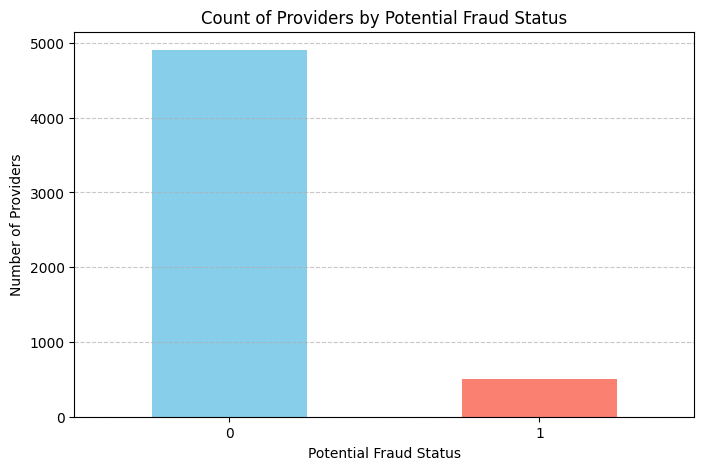

In [22]:
# Group by 'PotentialFraud' and count occurrences
fraud_counts = df_provider['PotentialFraud'].value_counts()

# Create the bar graph
plt.figure(figsize=(8, 5))
fraud_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Customize the plot
plt.title('Count of Providers by Potential Fraud Status')
plt.xlabel('Potential Fraud Status')
plt.ylabel('Number of Providers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the graph
plt.show()

Here we can see the inbalance in the dataset. We have a lot more nonfraudulent cases than fraudulent cases. 

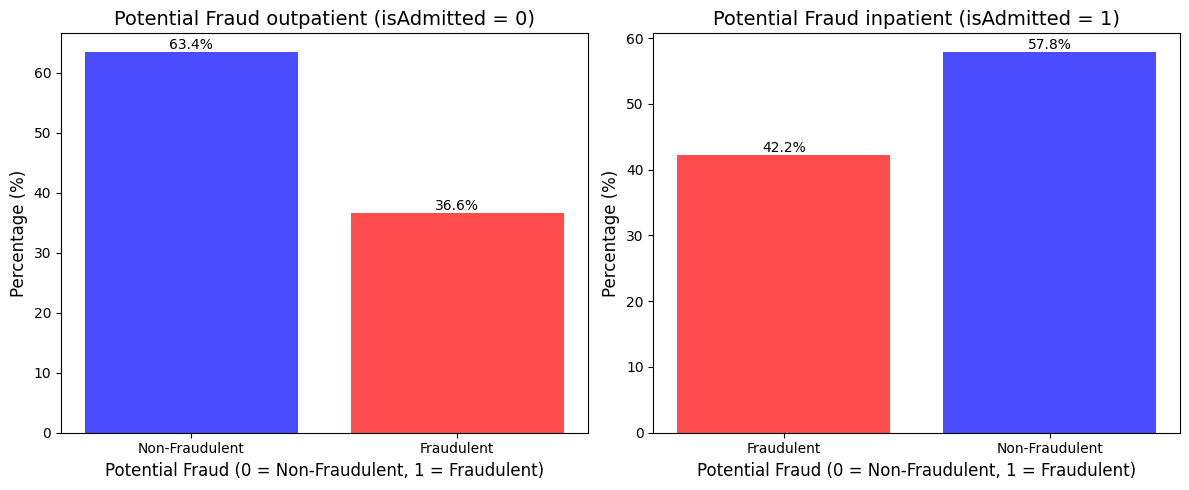

In [23]:
# Filter the data for 'isAdmitted = 0' and 'isAdmitted = 1'
admitted_0 = df_train[df_train['isAdmitted'] == 0]
admitted_1 = df_train[df_train['isAdmitted'] == 1]

# Calculate percentages for 'PotentialFraud' in each subset
fraud_percentages_0 = (admitted_0['PotentialFraud'].value_counts() / len(admitted_0)) * 100
fraud_percentages_1 = (admitted_1['PotentialFraud'].value_counts() / len(admitted_1)) * 100

# Create the first bar graph for 'isAdmitted = 0'
plt.figure(figsize=(12, 5))

# Subplot for isAdmitted = 0
plt.subplot(1, 2, 1)
bars_0 = plt.bar(fraud_percentages_0.index, fraud_percentages_0, color=['blue', 'red'], alpha=0.7)
for bar in bars_0:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
plt.title('Potential Fraud outpatient (isAdmitted = 0)', fontsize=14)
plt.xlabel('Potential Fraud (0 = Non-Fraudulent, 1 = Fraudulent)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(fraud_percentages_0.index, ['Non-Fraudulent', 'Fraudulent'])

# Subplot for isAdmitted = 1
plt.subplot(1, 2, 2)
bars_1 = plt.bar(fraud_percentages_1.index, fraud_percentages_1, color=['blue', 'red'], alpha=0.7)
for bar in bars_1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
plt.title('Potential Fraud inpatient (isAdmitted = 1)', fontsize=14)
plt.xlabel('Potential Fraud (0 = Non-Fraudulent, 1 = Fraudulent)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(fraud_percentages_1.index, ['Non-Fraudulent', 'Fraudulent'])

# Adjust layout and display the graphs
plt.tight_layout()
plt.show()

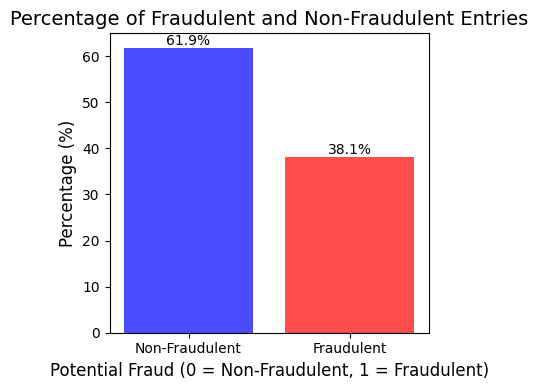

In [24]:
# Count the occurrences of each 'PotentialFraud' value
fraud_counts = df_train['PotentialFraud'].value_counts()

# Calculate the total number of rows
total_entries = len(df_train)

# Calculate the percentages
fraud_percentages = (fraud_counts / total_entries) * 100

# Plot the bar graph
plt.figure(figsize=(4, 4))
bars = plt.bar(fraud_percentages.index, fraud_percentages, color=['blue', 'red'], alpha=0.7)

# Add percentages on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# Set titles and labels
plt.title('Percentage of Fraudulent and Non-Fraudulent Entries', fontsize=14)
plt.xlabel('Potential Fraud (0 = Non-Fraudulent, 1 = Fraudulent)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(fraud_percentages.index, ['Non-Fraudulent', 'Fraudulent'])

# Show the graph
plt.tight_layout()
plt.show()

All to see that there is a lot more faudulent claims in Inpatient rather than outpatient. Speculation as to why this may be the case is that there is a lot more money to be made in inpatient claims than outpatient claims making it more worthwhile when cosidering risk. 

#### Comparing the money associated to each health insurance claim

## EDA Beneficiary

### Gender

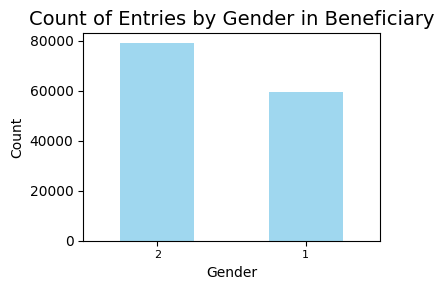

In [25]:
# Count the occurrences of each gender
gender_counts = df_beneficiary['Gender'].value_counts()

# Create the bar graph
plt.figure(figsize=(4, 3))
gender_counts.plot(kind='bar', color='skyblue', alpha=0.8)

# Add labels and title
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of Entries by Gender in Beneficiary', fontsize=14)
plt.xticks(rotation=0, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

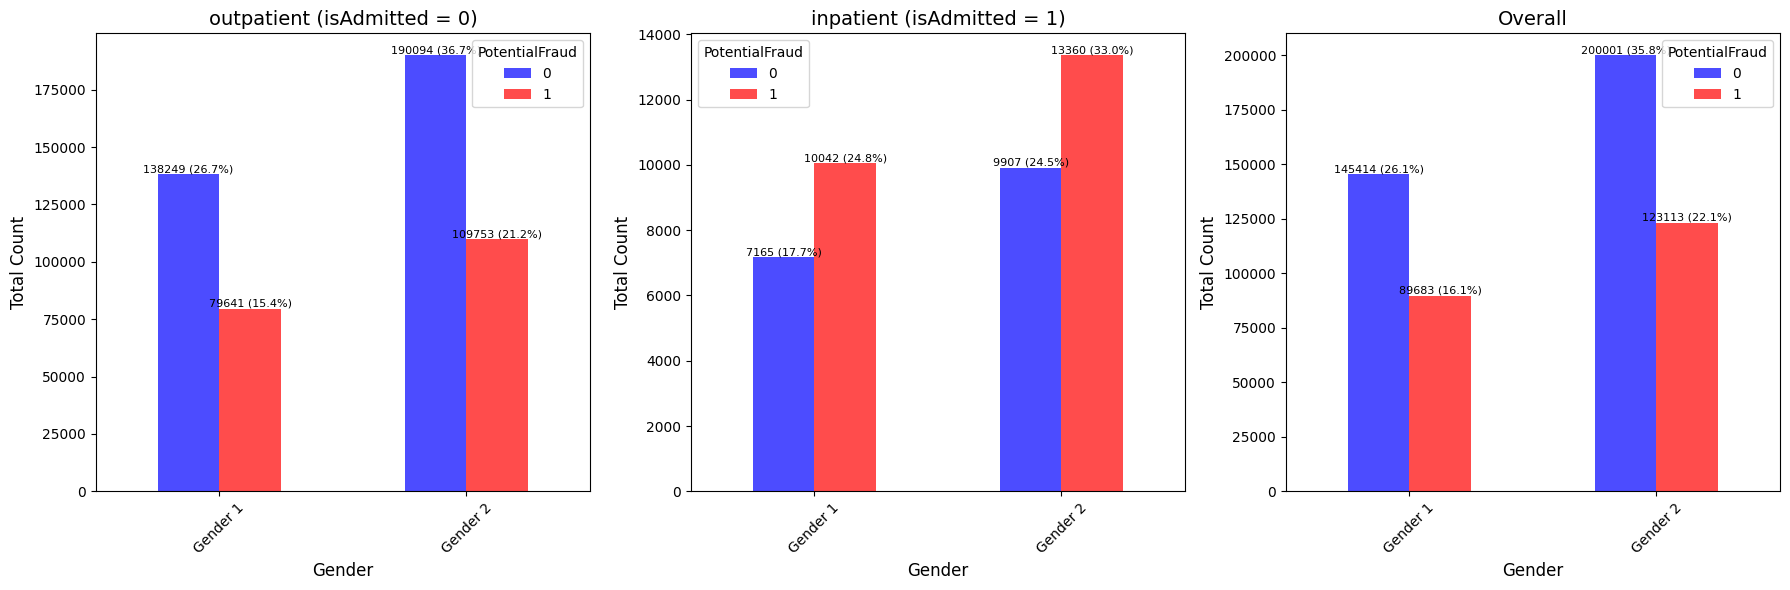

In [26]:
# Create a figure with three subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Define the races present in the dataset
genders = df_train['Gender'].unique()

# Function to plot the total count of entries and display percentages
def plot_potential_fraud(ax, data, title):
    # Calculate the total count of entries for each race group and PotentialFraud
    gender_potential_fraud = data.groupby(['Gender', 'PotentialFraud']).size().unstack(fill_value=0)
    
    # Plot bars (showing total counts)
    gender_potential_fraud.plot(kind='bar', stacked=False, ax=ax, color=['blue', 'red'], alpha=0.7)
    
    # Add percentages on top of the bars
    total_count = gender_potential_fraud.sum().sum()  # Total entries in the plot
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x_position = p.get_x() + width / 2
        y_position = p.get_y() + height
        percentage = (height / total_count) * 100
        ax.text(x_position, y_position, f'{height} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=8)

    # Set labels and title
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Gender', fontsize=12)
    ax.set_ylabel('Total Count', fontsize=12)
    ax.set_xticklabels([f'Gender {int(gender)}' for gender in genders], rotation=45)

# Plot for 'isAdmitted' = 0
admitted_0 = df_train[df_train['isAdmitted'] == 0]
plot_potential_fraud(axs[0], admitted_0, 'outpatient (isAdmitted = 0)')

# Plot for 'isAdmitted' = 1
admitted_1 = df_train[df_train['isAdmitted'] == 1]
plot_potential_fraud(axs[1], admitted_1, 'inpatient (isAdmitted = 1)')

# Plot for the overall dataset (no filtering by 'isAdmitted')
plot_potential_fraud(axs[2], df_train, 'Overall')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Race

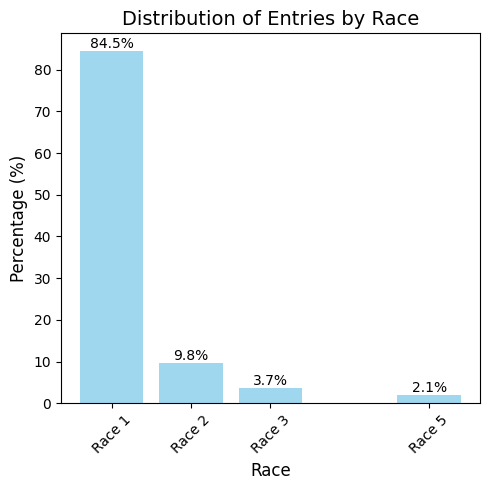

In [27]:
# Count the occurrences of each race
race_counts = df_beneficiary['Race'].value_counts()

# Calculate the total number of rows
total_entries = len(df_beneficiary)

# Calculate percentages
race_percentages = (race_counts / total_entries) * 100

# Create the bar graph
plt.figure(figsize=(5, 5))
bars = plt.bar(race_percentages.index, race_percentages, color='skyblue', alpha=0.8)

# Add percentages on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Distribution of Entries by Race', fontsize=14)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Customize x-axis
plt.xticks(race_percentages.index, labels=[f'Race {int(i)}' for i in race_percentages.index], rotation=45)

# Display the graph
plt.tight_layout()
plt.show()

Race group #4 is not represented in the dataset leading to a limitation in the dataset. 

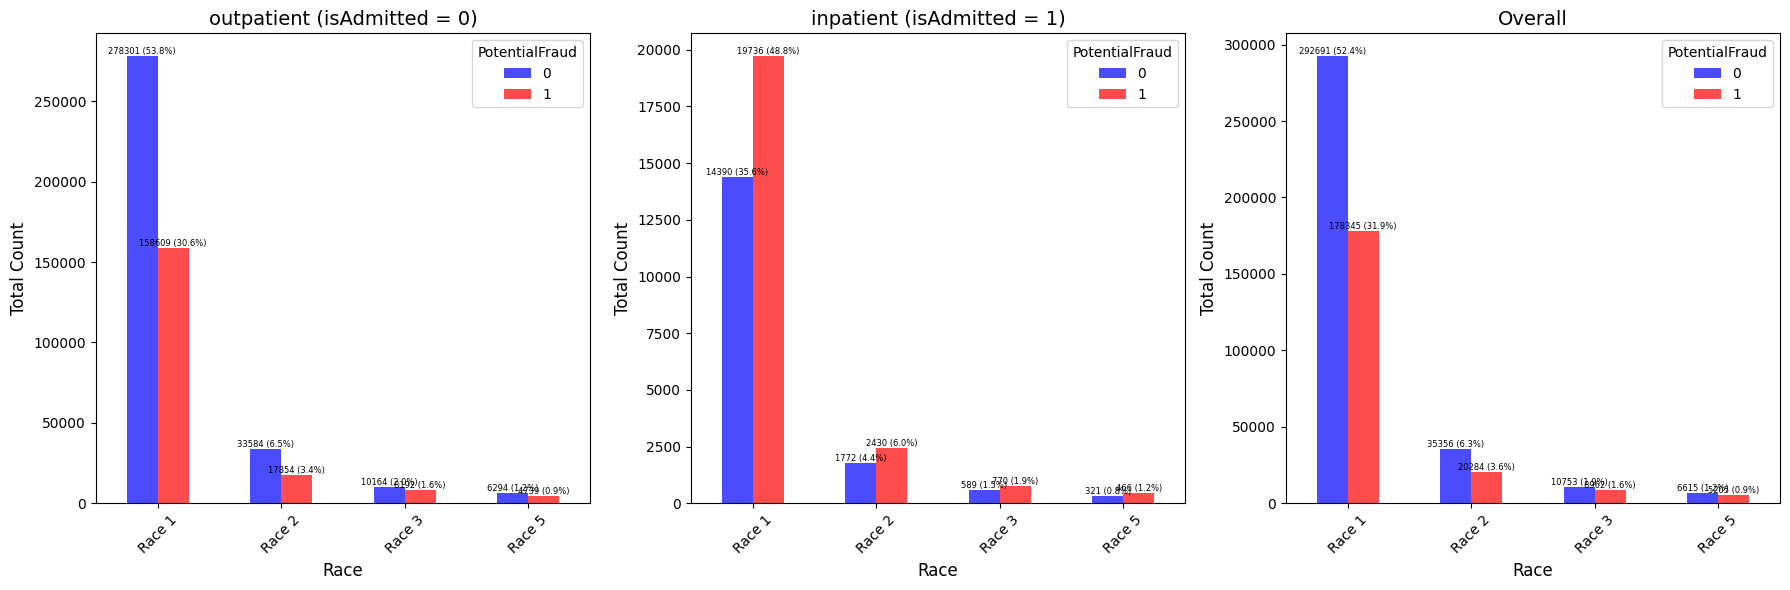

In [28]:
# Create a figure with three subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Define the races present in the dataset
races = df_train['Race'].unique()

# Function to plot the total count of entries and display percentages
def plot_potential_fraud(ax, data, title):
    # Calculate the total count of entries for each race group and PotentialFraud
    race_potential_fraud = data.groupby(['Race', 'PotentialFraud']).size().unstack(fill_value=0)
    
    # Plot bars (showing total counts)
    race_potential_fraud.plot(kind='bar', stacked=False, ax=ax, color=['blue', 'red'], alpha=0.7)
    
    # Add percentages on top of the bars
    total_count = race_potential_fraud.sum().sum()  # Total entries in the plot
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x_position = p.get_x() + width / 2
        y_position = p.get_y() + height
        percentage = (height / total_count) * 100
        ax.text(x_position, y_position, f'{height} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=6)

    # Set labels and title
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Race', fontsize=12)
    ax.set_ylabel('Total Count', fontsize=12)
    ax.set_xticklabels([f'Race {int(race)}' for race in races], rotation=45)

# Plot for 'isAdmitted' = 0
admitted_0 = df_train[df_train['isAdmitted'] == 0]
plot_potential_fraud(axs[0], admitted_0, 'outpatient (isAdmitted = 0)')

# Plot for 'isAdmitted' = 1
admitted_1 = df_train[df_train['isAdmitted'] == 1]
plot_potential_fraud(axs[1], admitted_1, 'inpatient (isAdmitted = 1)')

# Plot for the overall dataset (no filtering by 'isAdmitted')
plot_potential_fraud(axs[2], df_train, 'Overall')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

We can see that there is no clear indication of fraud by race. 

### Age

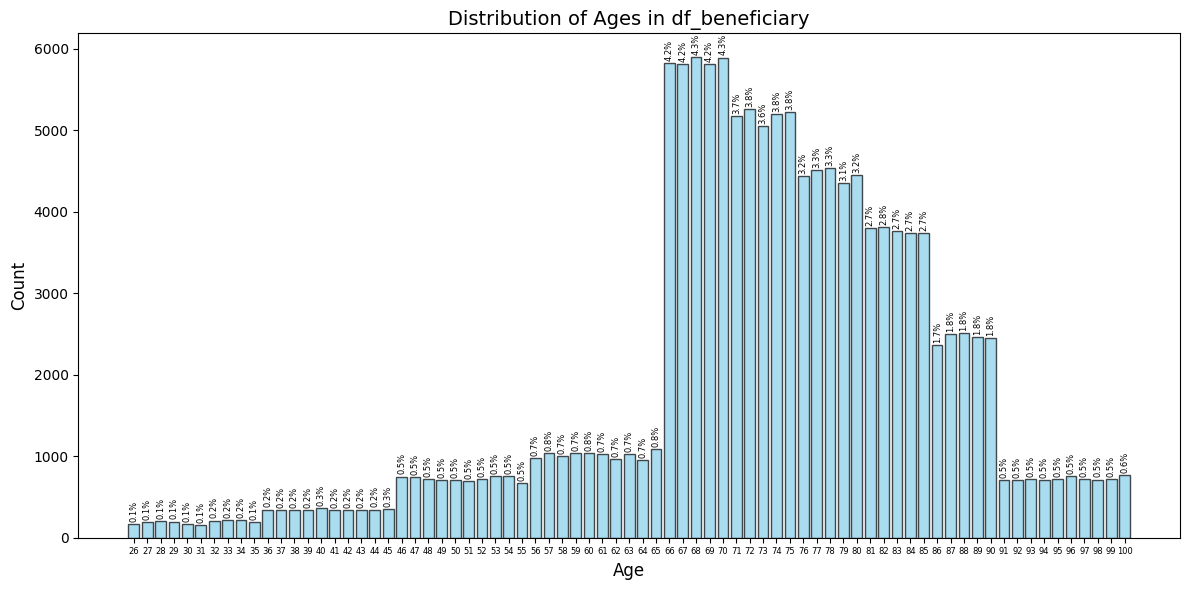

In [29]:
# Count occurrences of each unique age in the 'Age' column
age_counts = df_beneficiary['Age'].value_counts().sort_index()

# Calculate the percentage of each count
total_counts = age_counts.sum()
age_percentages = (age_counts / total_counts) * 100

# Plotting the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(age_counts.index, age_counts, color='skyblue', edgecolor='black', alpha=0.7)

# Display percentages on top of each bar with upward tilt
for bar in bars:
    height = bar.get_height()
    x_position = bar.get_x() + bar.get_width() / 2
    percentage = (height / total_counts) * 100
    plt.text(x_position, height + 25, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=6, rotation=90)

# Add age labels below each bar
plt.xticks(age_counts.index, rotation=0, fontsize=6)  # Set the age values on the x-axis without rotation

# Add labels and title
plt.title('Distribution of Ages in df_beneficiary', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

As we can see most of the polulation of beneficairy is between the age of 66 to 90. 

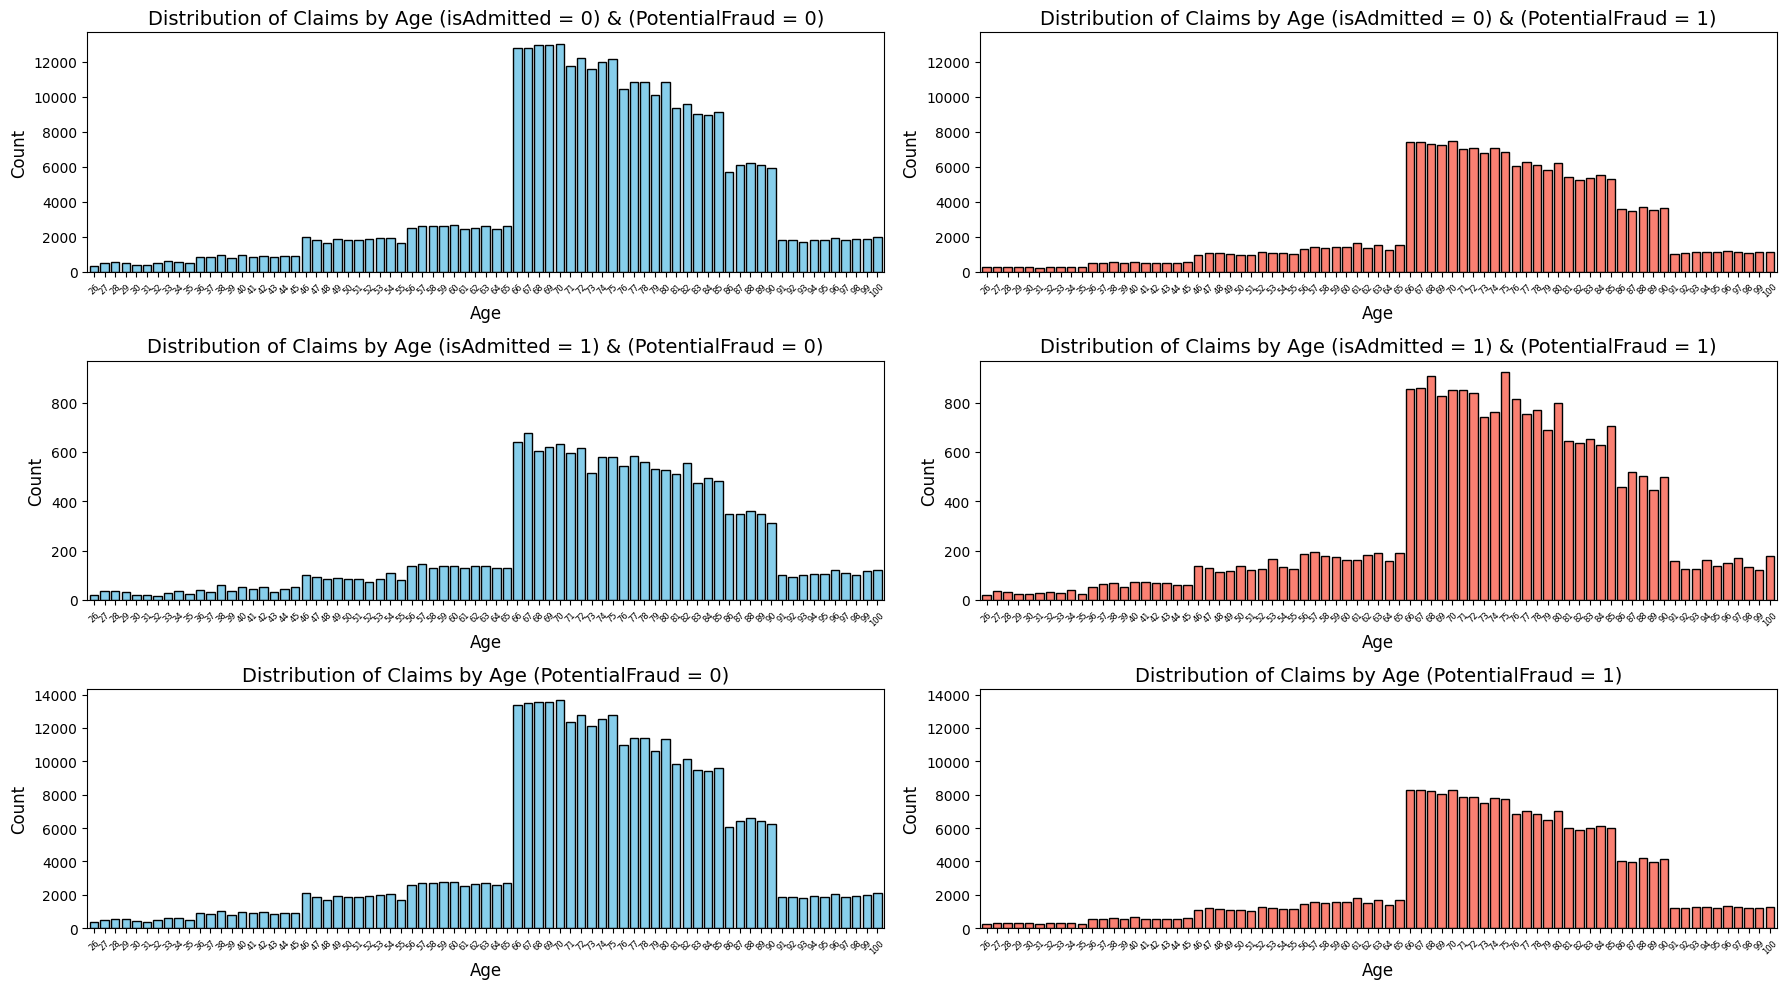

In [30]:
# Helper function to create the bar plots
def plot_age_fraud(df, is_admitted_value=None, potential_fraud_value=None, ax=None, color_bar=None):
    # Filter dataset by 'isAdmitted' and 'PotentialFraud' values if provided
    if is_admitted_value is not None:
        df = df[df['isAdmitted'] == is_admitted_value]
    if potential_fraud_value is not None:
        df = df[df['PotentialFraud'] == potential_fraud_value]

    # Group by 'Age' and count the number of entries
    age_fraud_counts = df.groupby(['Age']).size()

    # Plotting the bar graph on the provided axes
    age_fraud_counts.plot(kind='bar', color=color_bar, edgecolor='black', width=0.8, ax=ax)

    # Add labels and title
    title = f'Distribution of Claims by Age'
    if is_admitted_value is not None:
        title += f' (isAdmitted = {is_admitted_value}) &'
    if potential_fraud_value is not None:
        title += f' (PotentialFraud = {potential_fraud_value})'
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Age', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xticklabels(age_fraud_counts.index, rotation=45, fontsize=6)

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(3, 2, figsize=(18, 10))  # Increased the width for more space

# Plot for 'isAdmitted' = 0, PotentialFraud = 0 (nonfraudulent)
plot_age_fraud(df_train, is_admitted_value=0, potential_fraud_value=0, ax=axes[0, 0], color_bar='skyblue')

# Plot for 'isAdmitted' = 0, PotentialFraud = 1 (fraudulent)
plot_age_fraud(df_train, is_admitted_value=0, potential_fraud_value=1, ax=axes[0, 1], color_bar='salmon')

# Plot for 'isAdmitted' = 1, PotentialFraud = 0 (nonfraudulent)
plot_age_fraud(df_train, is_admitted_value=1, potential_fraud_value=0, ax=axes[1, 0], color_bar='skyblue')

# Plot for 'isAdmitted' = 1, PotentialFraud = 1 (fraudulent)
plot_age_fraud(df_train, is_admitted_value=1, potential_fraud_value=1, ax=axes[1, 1], color_bar='salmon')

# Plot for PotentialFraud = 0 (all is_admitted statuses)
plot_age_fraud(df_train, potential_fraud_value=0, ax=axes[2, 0], color_bar='skyblue')

# Plot for PotentialFraud = 1 (all is_admitted statuses)
plot_age_fraud(df_train, potential_fraud_value=1, ax=axes[2, 1], color_bar='salmon')


# Set consistent y-axis limits for each row (based on maximum y value in the row)
# For the first row (axes[0, 0], axes[0, 1])
y_max_0 = max(axes[0, 0].get_ylim()[1], axes[0, 1].get_ylim()[1])
axes[0, 0].set_ylim(0, y_max_0)
axes[0, 1].set_ylim(0, y_max_0)

# For the second row (axes[1, 0], axes[1, 1])
y_max_1 = max(axes[1, 0].get_ylim()[1], axes[1, 1].get_ylim()[1])
axes[1, 0].set_ylim(0, y_max_1)
axes[1, 1].set_ylim(0, y_max_1)

# For the third row (axes[2, 0], axes[2, 1])
y_max_2 = max(axes[2, 0].get_ylim()[1], axes[2, 1].get_ylim()[1])
axes[2, 0].set_ylim(0, y_max_2)
axes[2, 1].set_ylim(0, y_max_2)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

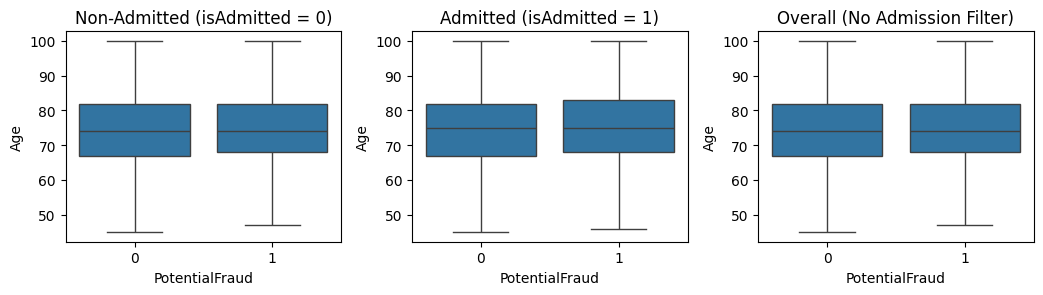

In [31]:

# Create the figure and set the size
plt.figure(figsize=(14, 8))

# Plot the boxplot for 'isAdmitted' == 0 (Non-Admitted)
plt.subplot(3, 4, 1)
sns.boxplot(x='PotentialFraud', y='Age', data=df_train[df_train['isAdmitted'] == 0], showfliers=False)
plt.title('Non-Admitted (isAdmitted = 0)')
plt.ylabel('Age')

# Plot the boxplot for 'isAdmitted' == 1 (Admitted)
plt.subplot(3, 4, 2)
sns.boxplot(x='PotentialFraud', y='Age', data=df_train[df_train['isAdmitted'] == 1], showfliers=False)
plt.title('Admitted (isAdmitted = 1)')
plt.ylabel('Age')

# Plot the boxplot for 'Overall' group
plt.subplot(3, 4, 3)
sns.boxplot(x='PotentialFraud', y='Age', data=df_train, showfliers=False)
plt.title('Overall (No Admission Filter)')
plt.ylabel('Age')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

We can see there is no direct you can make with Age and fraudulent activity.

### ChronicCond_KidneyDisease

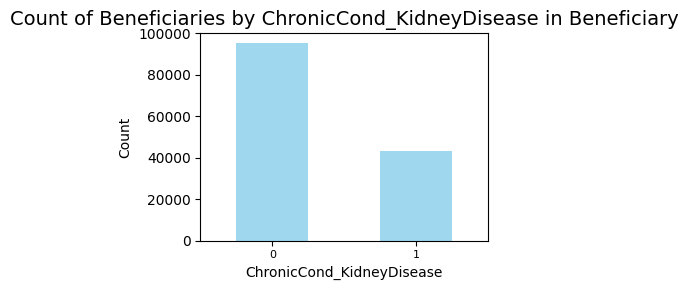

In [32]:
# Count the occurrences of each gender
CDK_counts = df_beneficiary['ChronicCond_KidneyDisease'].value_counts()

# Create the bar graph
plt.figure(figsize=(4, 3))
CDK_counts.plot(kind='bar', color='skyblue', alpha=0.8)

# Add labels and title
plt.xlabel('ChronicCond_KidneyDisease', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of Beneficiaries by ChronicCond_KidneyDisease in Beneficiary', fontsize=14)
plt.xticks(rotation=0, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

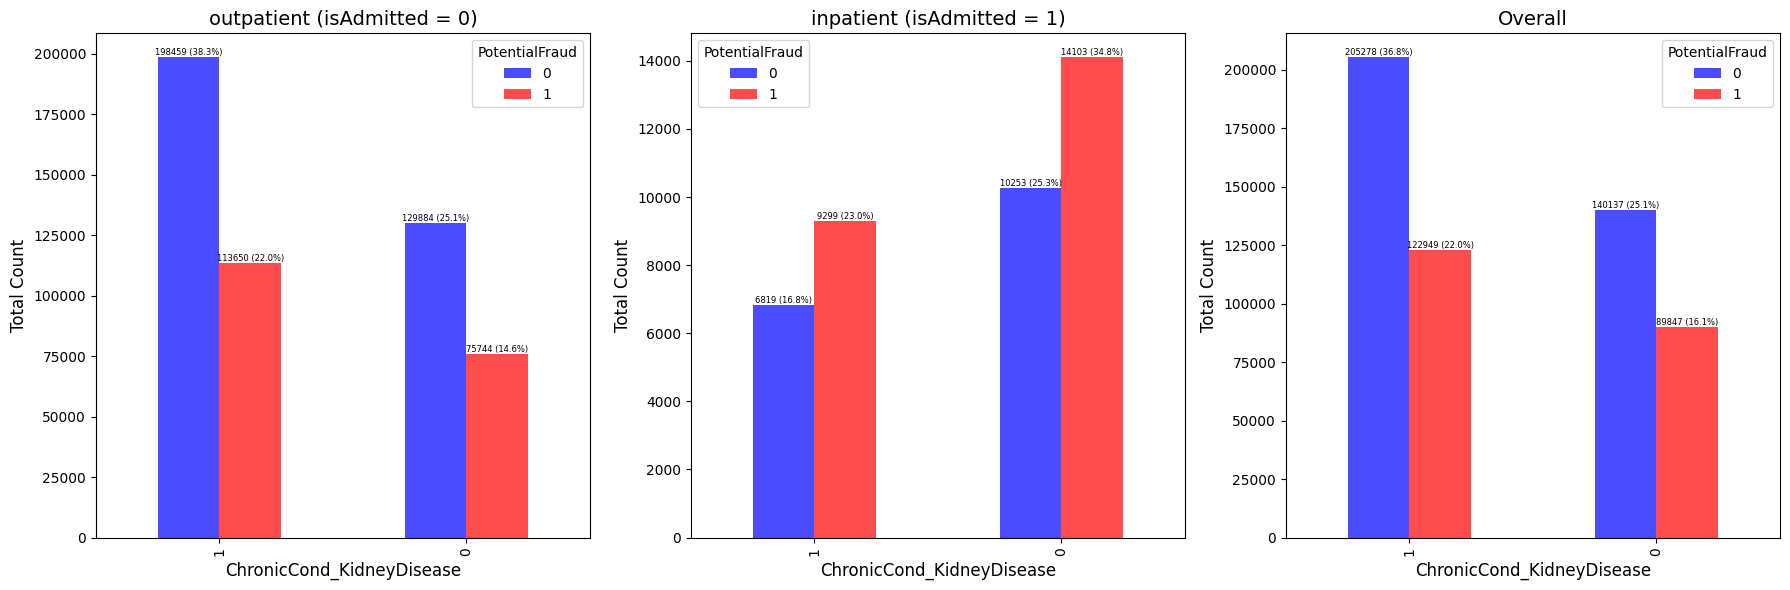

In [33]:
# Create a figure with three subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Define the races present in the dataset
CKDs = df_train['ChronicCond_KidneyDisease'].unique()

# Function to plot the total count of entries and display percentages
def plot_potential_fraud(ax, data, title):
    # Calculate the total count of entries for each race group and PotentialFraud
    CKD_potential_fraud = data.groupby(['ChronicCond_KidneyDisease', 'PotentialFraud']).size().unstack(fill_value=0)
    
    # Plot bars (showing total counts)
    CKD_potential_fraud.plot(kind='bar', stacked=False, ax=ax, color=['blue', 'red'], alpha=0.7)
    
    # Add percentages on top of the bars
    total_count = CKD_potential_fraud.sum().sum()  # Total entries in the plot
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x_position = p.get_x() + width / 2
        y_position = p.get_y() + height
        percentage = (height / total_count) * 100
        ax.text(x_position, y_position, f'{height} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=6)

    # Set labels and title
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('ChronicCond_KidneyDisease', fontsize=12)
    ax.set_ylabel('Total Count', fontsize=12)
    ax.set_xticklabels([f'{int(CKD)}' for CKD in CKDs])

# Plot for 'isAdmitted' = 0
admitted_0 = df_train[df_train['isAdmitted'] == 0]
plot_potential_fraud(axs[0], admitted_0, 'outpatient (isAdmitted = 0)')

# Plot for 'isAdmitted' = 1
admitted_1 = df_train[df_train['isAdmitted'] == 1]
plot_potential_fraud(axs[1], admitted_1, 'inpatient (isAdmitted = 1)')

# Plot for the overall dataset (no filtering by 'isAdmitted')
plot_potential_fraud(axs[2], df_train, 'Overall')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## EDA Inpatient & Outpatient claims 

### DeductibleAmtPaid & InscClaimAmtReimbursed

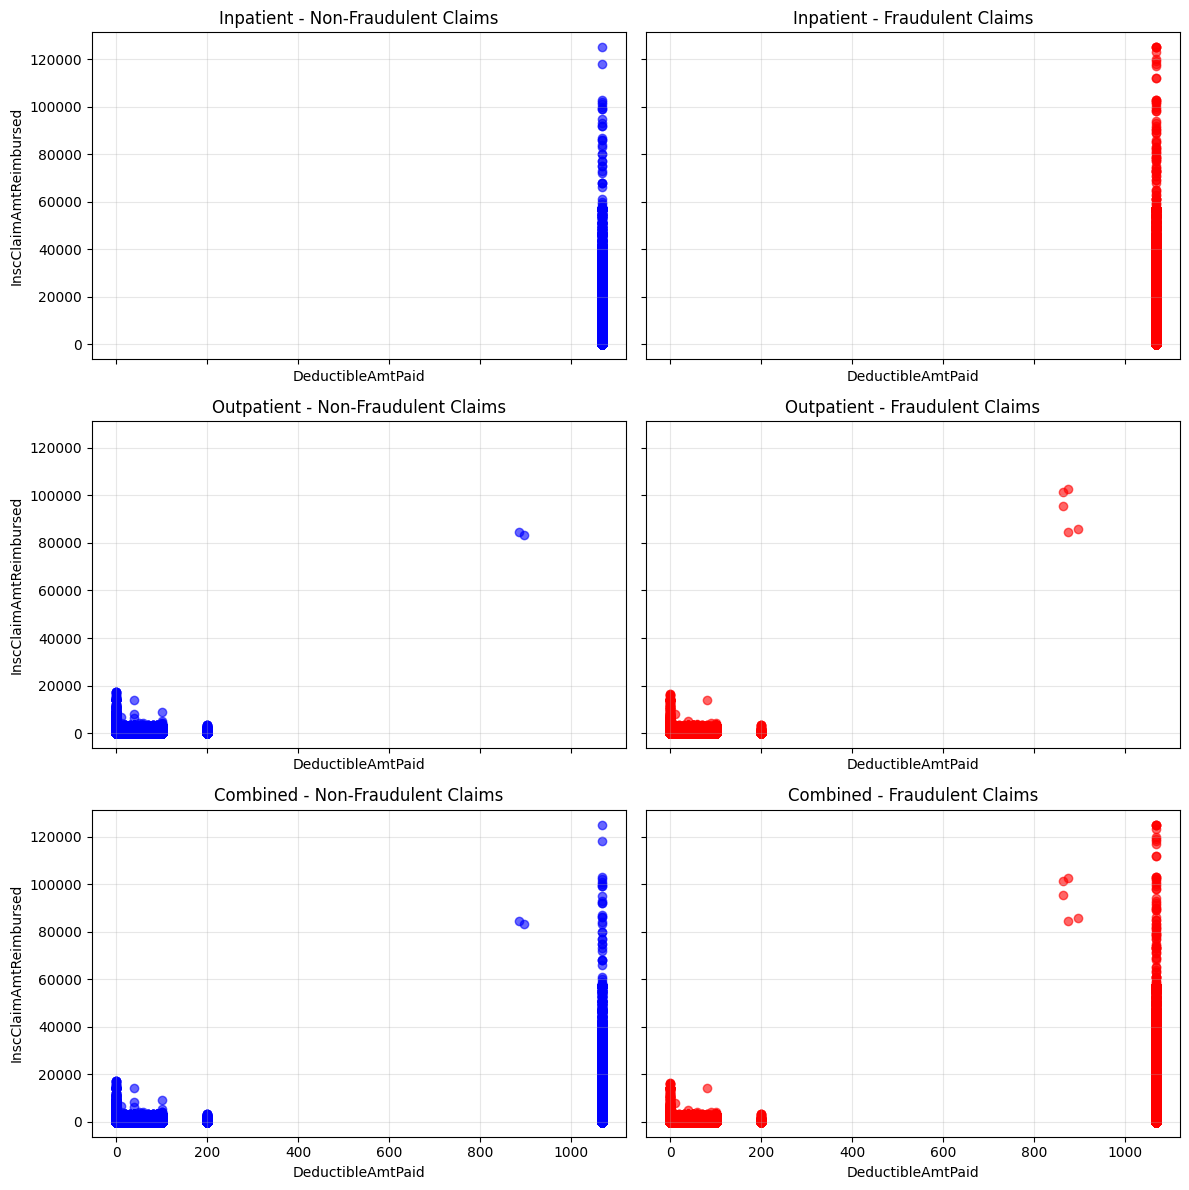

In [34]:
# Merge inpatient and outpatient with provider to include 'PotentialFraud'
inpatient_merged = df_inpatient.merge(df_provider[['Provider', 'PotentialFraud']], on='Provider', how='inner')
outpatient_merged = df_outpatient.merge(df_provider[['Provider', 'PotentialFraud']], on='Provider', how='inner')

# Split into fraudulent and non-fraudulent groups for inpatient and outpatient
fraudulent_inpatient = inpatient_merged[inpatient_merged['PotentialFraud'] == 1]
nonfraudulent_inpatient = inpatient_merged[inpatient_merged['PotentialFraud'] == 0]

fraudulent_outpatient = outpatient_merged[outpatient_merged['PotentialFraud'] == 1]
nonfraudulent_outpatient = outpatient_merged[outpatient_merged['PotentialFraud'] == 0]

# Combine inpatient and outpatient data for further analysis
combined_data = pd.concat([inpatient_merged, outpatient_merged], ignore_index=True)

# Split combined data into fraudulent and non-fraudulent
fraudulent_combined = combined_data[combined_data['PotentialFraud'] == 1]
nonfraudulent_combined = combined_data[combined_data['PotentialFraud'] == 0]

# Create side-by-side scatterplots with flipped axes and smaller size
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True, sharey=True)  # Adjusted figure size

# Inpatient - Non-Fraudulent
axes[0, 0].scatter(
    nonfraudulent_inpatient['DeductibleAmtPaid'], 
    nonfraudulent_inpatient['InscClaimAmtReimbursed'], 
    alpha=0.6, color='blue'
)
axes[0, 0].set_title('Inpatient - Non-Fraudulent Claims', fontsize=12)
axes[0, 0].set_xlabel('DeductibleAmtPaid', fontsize=10)
axes[0, 0].set_ylabel('InscClaimAmtReimbursed', fontsize=10)
axes[0, 0].grid(alpha=0.3)

# Inpatient - Fraudulent
axes[0, 1].scatter(
    fraudulent_inpatient['DeductibleAmtPaid'], 
    fraudulent_inpatient['InscClaimAmtReimbursed'], 
    alpha=0.6, color='red'
)
axes[0, 1].set_title('Inpatient - Fraudulent Claims', fontsize=12)
axes[0, 1].set_xlabel('DeductibleAmtPaid', fontsize=10)
axes[0, 1].grid(alpha=0.3)

# Outpatient - Non-Fraudulent
axes[1, 0].scatter(
    nonfraudulent_outpatient['DeductibleAmtPaid'], 
    nonfraudulent_outpatient['InscClaimAmtReimbursed'], 
    alpha=0.6, color='blue'
)
axes[1, 0].set_title('Outpatient - Non-Fraudulent Claims', fontsize=12)
axes[1, 0].set_xlabel('DeductibleAmtPaid', fontsize=10)
axes[1, 0].set_ylabel('InscClaimAmtReimbursed', fontsize=10)
axes[1, 0].grid(alpha=0.3)

# Outpatient - Fraudulent
axes[1, 1].scatter(
    fraudulent_outpatient['DeductibleAmtPaid'], 
    fraudulent_outpatient['InscClaimAmtReimbursed'], 
    alpha=0.6, color='red'
)
axes[1, 1].set_title('Outpatient - Fraudulent Claims', fontsize=12)
axes[1, 1].set_xlabel('DeductibleAmtPaid', fontsize=10)
axes[1, 1].grid(alpha=0.3)

# Combined - Non-Fraudulent
axes[2, 0].scatter(
    nonfraudulent_combined['DeductibleAmtPaid'], 
    nonfraudulent_combined['InscClaimAmtReimbursed'], 
    alpha=0.6, color='blue'
)
axes[2, 0].set_title('Combined - Non-Fraudulent Claims', fontsize=12)
axes[2, 0].set_xlabel('DeductibleAmtPaid', fontsize=10)
axes[2, 0].set_ylabel('InscClaimAmtReimbursed', fontsize=10)
axes[2, 0].grid(alpha=0.3)

# Combined - Fraudulent
axes[2, 1].scatter(
    fraudulent_combined['DeductibleAmtPaid'], 
    fraudulent_combined['InscClaimAmtReimbursed'], 
    alpha=0.6, color='red'
)
axes[2, 1].set_title('Combined - Fraudulent Claims', fontsize=12)
axes[2, 1].set_xlabel('DeductibleAmtPaid', fontsize=10)
axes[2, 1].grid(alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

### ClmAdmitDiagnosisCode

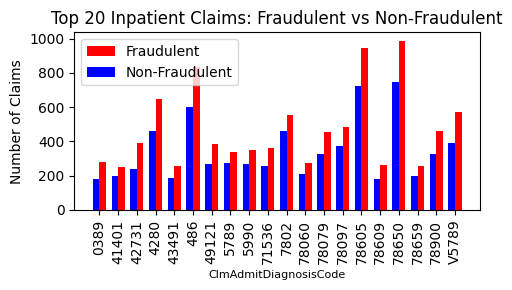

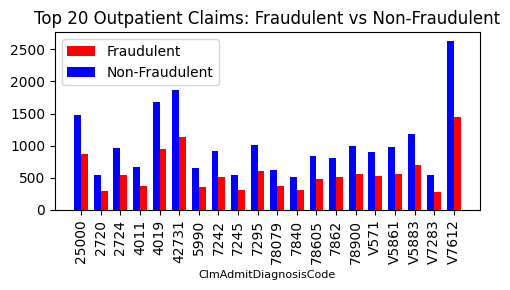

In [35]:
# Merge inpatient and outpatient with provider to include 'PotentialFraud'
inpatient_merged = df_inpatient.merge(df_provider[['Provider', 'PotentialFraud']], on='Provider', how='inner')
outpatient_merged = df_outpatient.merge(df_provider[['Provider', 'PotentialFraud']], on='Provider', how='inner')

# Inpatient Data: Group by ClmAdmitDiagnosisCode and PotentialFraud, then get top 20
inpatient_data = inpatient_merged.groupby(['ClmAdmitDiagnosisCode', 'PotentialFraud']).size().reset_index(name='ClaimCount')
inpatient_data_total = inpatient_data.groupby('ClmAdmitDiagnosisCode')['ClaimCount'].sum().reset_index()
top_20_inpatient = inpatient_data_total.sort_values(by='ClaimCount', ascending=False).head(20)

# Outpatient Data: Group by ClmAdmitDiagnosisCode and PotentialFraud, then get top 20
outpatient_data = outpatient_merged.groupby(['ClmAdmitDiagnosisCode', 'PotentialFraud']).size().reset_index(name='ClaimCount')
outpatient_data_total = outpatient_data.groupby('ClmAdmitDiagnosisCode')['ClaimCount'].sum().reset_index()
top_20_outpatient = outpatient_data_total.sort_values(by='ClaimCount', ascending=False).head(20)

# Filter the original data for only the top 20 ClmAdmitDiagnosisCodes
inpatient_filtered = inpatient_data[inpatient_data['ClmAdmitDiagnosisCode'].isin(top_20_inpatient['ClmAdmitDiagnosisCode'])]
outpatient_filtered = outpatient_data[outpatient_data['ClmAdmitDiagnosisCode'].isin(top_20_outpatient['ClmAdmitDiagnosisCode'])]

# Separate fraudulent and non-fraudulent data for inpatient and outpatient
inpatient_fraudulent = inpatient_filtered[inpatient_filtered['PotentialFraud'] == 1]
inpatient_nonfraudulent = inpatient_filtered[inpatient_filtered['PotentialFraud'] == 0]

outpatient_fraudulent = outpatient_filtered[outpatient_filtered['PotentialFraud'] == 1]
outpatient_nonfraudulent = outpatient_filtered[outpatient_filtered['PotentialFraud'] == 0]

# Merge fraudulent and non-fraudulent data for inpatient and outpatient
inpatient_combined = pd.merge(inpatient_fraudulent[['ClmAdmitDiagnosisCode', 'ClaimCount']], 
                              inpatient_nonfraudulent[['ClmAdmitDiagnosisCode', 'ClaimCount']], 
                              on='ClmAdmitDiagnosisCode', 
                              suffixes=('_fraudulent', '_nonfraudulent'))

outpatient_combined = pd.merge(outpatient_fraudulent[['ClmAdmitDiagnosisCode', 'ClaimCount']], 
                               outpatient_nonfraudulent[['ClmAdmitDiagnosisCode', 'ClaimCount']], 
                               on='ClmAdmitDiagnosisCode', 
                               suffixes=('_fraudulent', '_nonfraudulent'))

# Create an array of positions for the bars
inpatient_positions = np.arange(len(inpatient_combined))
outpatient_positions = np.arange(len(outpatient_combined))

# Plotting the Inpatient Claims (Fraudulent vs Non-Fraudulent)
plt.figure(figsize=(5, 3))
width = 0.35  # Bar width
plt.bar(inpatient_positions + width/2, inpatient_combined['ClaimCount_fraudulent'], width, label='Fraudulent', color='red')
plt.bar(inpatient_positions - width/2, inpatient_combined['ClaimCount_nonfraudulent'], width, label='Non-Fraudulent', color='blue')

plt.title('Top 20 Inpatient Claims: Fraudulent vs Non-Fraudulent', fontsize=12)
plt.xlabel('ClmAdmitDiagnosisCode', fontsize=8)
plt.ylabel('Number of Claims', fontsize=10)
plt.xticks(inpatient_positions, inpatient_combined['ClmAdmitDiagnosisCode'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

# Plotting the Outpatient Claims (Fraudulent vs Non-Fraudulent)
plt.figure(figsize=(5, 3))
plt.bar(outpatient_positions + width/2, outpatient_combined['ClaimCount_fraudulent'], width, label='Fraudulent', color='red')
plt.bar(outpatient_positions - width/2, outpatient_combined['ClaimCount_nonfraudulent'], width, label='Non-Fraudulent', color='blue')

plt.title('Top 20 Outpatient Claims: Fraudulent vs Non-Fraudulent', fontsize=12)
plt.xlabel('ClmAdmitDiagnosisCode', fontsize=8)
plt.xticks(outpatient_positions, outpatient_combined['ClmAdmitDiagnosisCode'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

### ClmDiagnosisCode_1

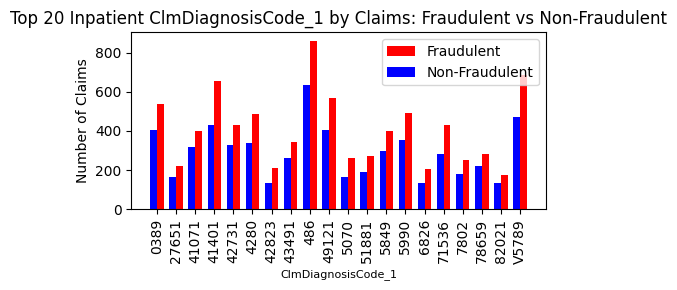

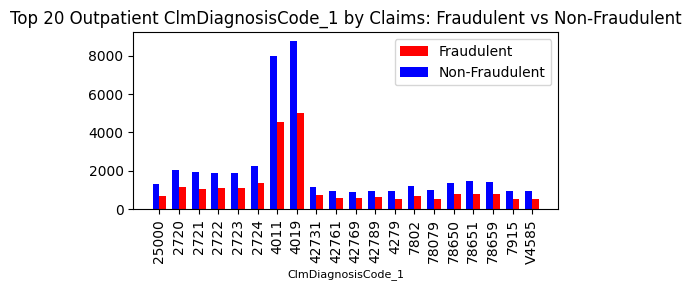

In [36]:
# Merge inpatient and outpatient with provider to include 'PotentialFraud'
inpatient_merged = df_inpatient.merge(df_provider[['Provider', 'PotentialFraud']], on='Provider', how='inner')
outpatient_merged = df_outpatient.merge(df_provider[['Provider', 'PotentialFraud']], on='Provider', how='inner')

# Inpatient Data: Group by ClmAdmitDiagnosisCode and PotentialFraud, then get top 20
inpatient_data = inpatient_merged.groupby(['ClmDiagnosisCode_1', 'PotentialFraud']).size().reset_index(name='ClaimCount')
inpatient_data_total = inpatient_data.groupby('ClmDiagnosisCode_1')['ClaimCount'].sum().reset_index()
top_20_inpatient = inpatient_data_total.sort_values(by='ClaimCount', ascending=False).head(20)

# Outpatient Data: Group by ClmAdmitDiagnosisCode and PotentialFraud, then get top 20
outpatient_data = outpatient_merged.groupby(['ClmDiagnosisCode_1', 'PotentialFraud']).size().reset_index(name='ClaimCount')
outpatient_data_total = outpatient_data.groupby('ClmDiagnosisCode_1')['ClaimCount'].sum().reset_index()
top_20_outpatient = outpatient_data_total.sort_values(by='ClaimCount', ascending=False).head(20)

# Filter the original data for only the top 20 ClmAdmitDiagnosisCodes
inpatient_filtered = inpatient_data[inpatient_data['ClmDiagnosisCode_1'].isin(top_20_inpatient['ClmDiagnosisCode_1'])]
outpatient_filtered = outpatient_data[outpatient_data['ClmDiagnosisCode_1'].isin(top_20_outpatient['ClmDiagnosisCode_1'])]

# Separate fraudulent and non-fraudulent data for inpatient and outpatient
inpatient_fraudulent = inpatient_filtered[inpatient_filtered['PotentialFraud'] == 1]
inpatient_nonfraudulent = inpatient_filtered[inpatient_filtered['PotentialFraud'] == 0]

outpatient_fraudulent = outpatient_filtered[outpatient_filtered['PotentialFraud'] == 1]
outpatient_nonfraudulent = outpatient_filtered[outpatient_filtered['PotentialFraud'] == 0]

# Merge fraudulent and non-fraudulent data for inpatient and outpatient
inpatient_combined = pd.merge(inpatient_fraudulent[['ClmDiagnosisCode_1', 'ClaimCount']], 
                              inpatient_nonfraudulent[['ClmDiagnosisCode_1', 'ClaimCount']], 
                              on='ClmDiagnosisCode_1', 
                              suffixes=('_fraudulent', '_nonfraudulent'))

outpatient_combined = pd.merge(outpatient_fraudulent[['ClmDiagnosisCode_1', 'ClaimCount']], 
                               outpatient_nonfraudulent[['ClmDiagnosisCode_1', 'ClaimCount']], 
                               on='ClmDiagnosisCode_1', 
                               suffixes=('_fraudulent', '_nonfraudulent'))

# Create an array of positions for the bars
inpatient_positions = np.arange(len(inpatient_combined))
outpatient_positions = np.arange(len(outpatient_combined))

# Plotting the Inpatient Claims (Fraudulent vs Non-Fraudulent)
plt.figure(figsize=(5, 3))
width = 0.35  # Bar width
plt.bar(inpatient_positions + width/2, inpatient_combined['ClaimCount_fraudulent'], width, label='Fraudulent', color='red')
plt.bar(inpatient_positions - width/2, inpatient_combined['ClaimCount_nonfraudulent'], width, label='Non-Fraudulent', color='blue')

plt.title('Top 20 Inpatient ClmDiagnosisCode_1 by Claims: Fraudulent vs Non-Fraudulent', fontsize=12)
plt.xlabel('ClmDiagnosisCode_1', fontsize=8)
plt.ylabel('Number of Claims', fontsize=10)
plt.xticks(inpatient_positions, inpatient_combined['ClmDiagnosisCode_1'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

# Plotting the Outpatient Claims (Fraudulent vs Non-Fraudulent)
plt.figure(figsize=(5, 3))
plt.bar(outpatient_positions + width/2, outpatient_combined['ClaimCount_fraudulent'], width, label='Fraudulent', color='red')
plt.bar(outpatient_positions - width/2, outpatient_combined['ClaimCount_nonfraudulent'], width, label='Non-Fraudulent', color='blue')

plt.title('Top 20 Outpatient ClmDiagnosisCode_1 by Claims: Fraudulent vs Non-Fraudulent', fontsize=12)
plt.xlabel('ClmDiagnosisCode_1', fontsize=8)
plt.xticks(outpatient_positions, outpatient_combined['ClmDiagnosisCode_1'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

# Feature Engineering



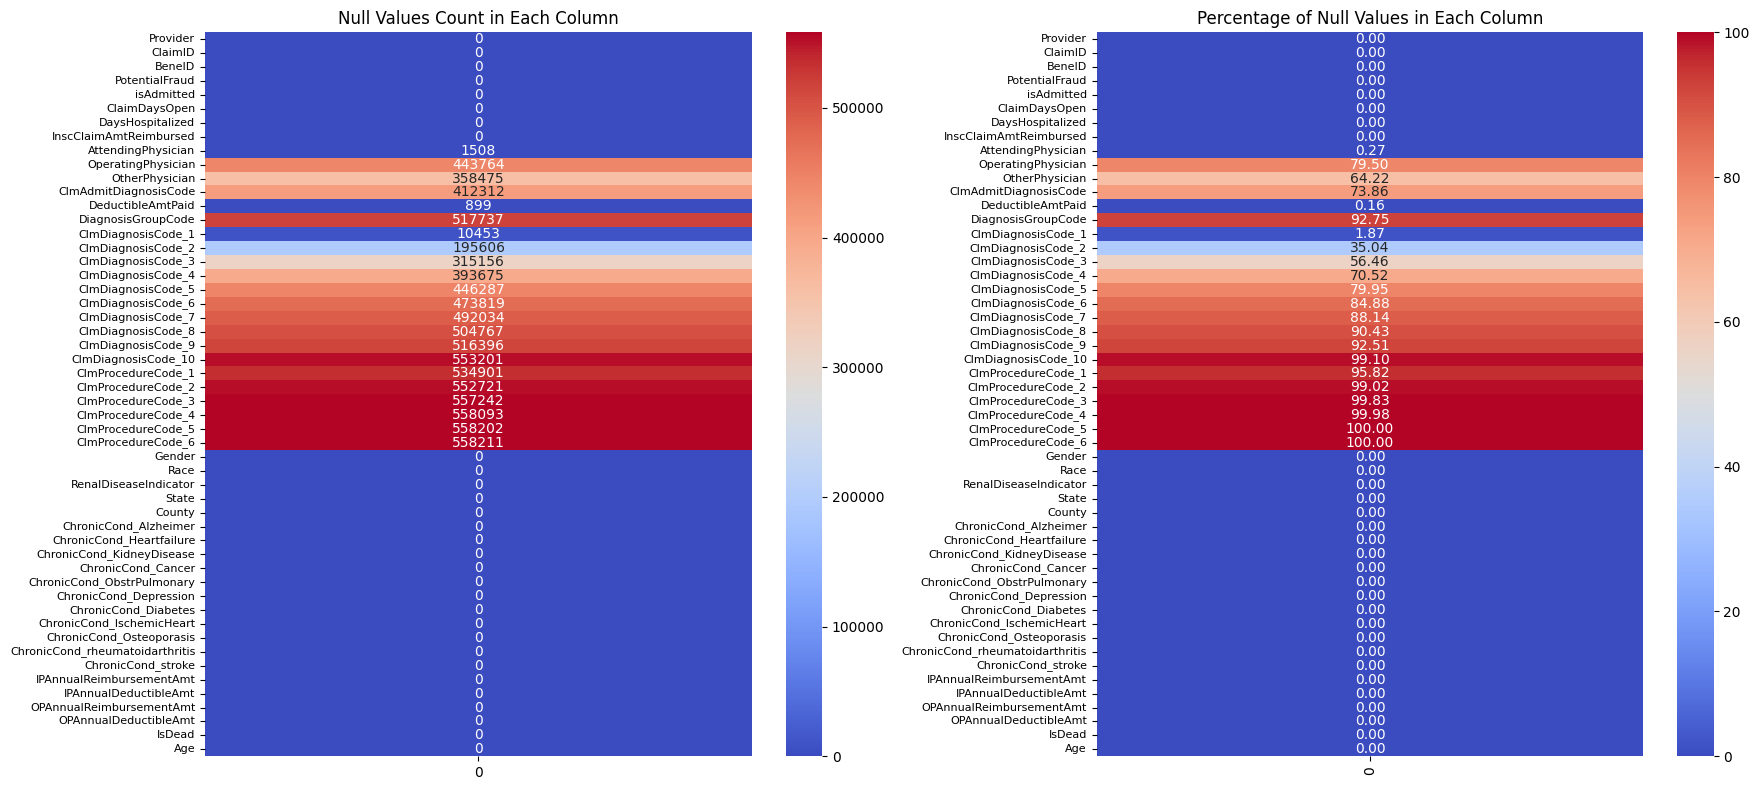

In [37]:
# Calculate the sum of null values for each column
null_count = df_train.isnull().sum()

# Calculate the percentage of null values for each column
null_percentage = df_train.isnull().mean() * 100

# Convert the values into DataFrames
null_count_df = pd.DataFrame(null_count)
null_percentage_df = pd.DataFrame(null_percentage)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # Adjust the size to fit both plots

# Plot the heatmap for null counts
sns.heatmap(null_count_df, annot=True, fmt=".7g", cmap='coolwarm', cbar=True, ax=axes[0], yticklabels=df_train.columns)
axes[0].set_title('Null Values Count in Each Column')
axes[0].tick_params(axis='y', labelsize=8) 

# Plot the heatmap for null percentages
sns.heatmap(null_percentage_df, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, ax=axes[1], yticklabels=df_train.columns)
axes[1].set_title('Percentage of Null Values in Each Column')
axes[1].tick_params(axis='y', labelsize=8) 

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

As we can see the columns ClmProcedureCode_4, ClmProcedureCode_5, and ClmProcedureCode_6 can me removed as they are mostly null. 

In [38]:
df_train.drop(['ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], axis=1, inplace=True)

## Building Features

Since Fraud can be commited by one or a group of individuals. It's import to look at the relations in the data. For us to be able to analyze this data in a nonbias way we will create some more features and also aggregated features to the set

### Creating new features


#### Sum of Insc Claim Re-Imb Amount for a Provider

### Aggregated Features

In [39]:
def create_aggregation_features(feature, name):
    operation='sum'
    
    feature1 = name + "_INSC_AMT_REIMB"
    df_train[feature1] = df_train.groupby(feature)['InscClaimAmtReimbursed'].transform(operation)

    feature2 = name + "_DEDUC_AMT_PAID"
    df_train[feature2] = df_train.groupby(feature)['DeductibleAmtPaid'].transform(operation)

    feature3 = name + "_IP_ANNUAL_AMT_REIMB"
    df_train[feature3] = df_train.groupby(feature)['IPAnnualReimbursementAmt'].transform(operation)

    feature4 = name + "_IP_ANNUAL_AMT_DED"
    df_train[feature4] = df_train.groupby(feature)['IPAnnualDeductibleAmt'].transform(operation)

    feature5 = name + "_OP_ANNUAL_AMT_REIMB"
    df_train[feature5] = df_train.groupby(feature)['OPAnnualReimbursementAmt'].transform(operation)

    feature6 = name + "_OP_ANNUAL_AMT_DED"
    df_train[feature6] = df_train.groupby(feature)['OPAnnualDeductibleAmt'].transform(operation)

    feature7 = name + "_DAYS_HOSPOTILIZED"
    df_train[feature7] = df_train.groupby(feature)['DaysHospitalized'].transform(operation)

    feature8 = name + "_CLM_DAYS_OPEN"
    df_train[feature8] = df_train.groupby(feature)['ClaimDaysOpen'].transform(operation)

In [40]:
create_aggregation_features(feature='Provider', name='PROVIDER')
create_aggregation_features(feature='BeneID', name='BENE')
create_aggregation_features(feature='AttendingPhysician', name='A_PHY')
create_aggregation_features(feature='OperatingPhysician', name='OP_PHY')
create_aggregation_features(feature='OtherPhysician', name='OT_PHY')
create_aggregation_features(feature='ClmAdmitDiagnosisCode', name='CLM_ADMIT_DIAG_CODE')
create_aggregation_features(feature='DiagnosisGroupCode', name='GRP_DIAG_CODE')

In [41]:
create_aggregation_features(feature='ClmDiagnosisCode_1', name='CLM_DIAG_CODE_1')
create_aggregation_features(feature='ClmDiagnosisCode_2', name='CLM_DIAG_CODE_2')
create_aggregation_features(feature='ClmDiagnosisCode_3', name='CLM_DIAG_CODE_3')
create_aggregation_features(feature='ClmDiagnosisCode_4', name='CLM_DIAG_CODE_4')
create_aggregation_features(feature='ClmDiagnosisCode_5', name='CLM_DIAG_CODE_5')
create_aggregation_features(feature='ClmDiagnosisCode_6', name='CLM_DIAG_CODE_6')
create_aggregation_features(feature='ClmDiagnosisCode_7', name='CLM_DIAG_CODE_7')
create_aggregation_features(feature='ClmDiagnosisCode_8', name='CLM_DIAG_CODE_8')
create_aggregation_features(feature='ClmDiagnosisCode_9', name='CLM_DIAG_CODE_9')
create_aggregation_features(feature='ClmDiagnosisCode_10', name='CLM_DIAG_CODE_10')

create_aggregation_features(feature='ClmProcedureCode_1', name='CLM_PROC_CODE_1')
create_aggregation_features(feature='ClmProcedureCode_2', name='CLM_PROC_CODE_2')
create_aggregation_features(feature='ClmProcedureCode_3', name='CLM_PROC_CODE_3')

C:\Users\sligh\AppData\Local\Temp\ipykernel_13836\1080921874.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[feature8] = df_train.groupby(feature)['ClaimDaysOpen'].transform(operation)
C:\Users\sligh\AppData\Local\Temp\ipykernel_13836\1080921874.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[feature1] = df_train.groupby(feature)['InscClaimAmtReimbursed'].transform(operation)
C:\Users\sligh\AppData\Local\Temp\ipykernel_13836\1080921874.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is 

In [42]:
df_train.shape

(558211, 209)

In [43]:
df_train.head(2)

,Provider,ClaimID,BeneID,PotentialFraud,isAdmitted,ClaimDaysOpen,DaysHospitalized,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,Gender,Race,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,IsDead,Age,PROVIDER_INSC_AMT_REIMB,PROVIDER_DEDUC_AMT_PAID,PROVIDER_IP_ANNUAL_AMT_REIMB,PROVIDER_IP_ANNUAL_AMT_DED,PROVIDER_OP_ANNUAL_AMT_REIMB,PROVIDER_OP_ANNUAL_AMT_DED,PROVIDER_DAYS_HOSPOTILIZED,PROVIDER_CLM_DAYS_OPEN,BENE_INSC_AMT_REIMB,BENE_DEDUC_AMT_PAID,BENE_IP_ANNUAL_AMT_REIMB,BENE_IP_ANNUAL_AMT_DED,BENE_OP_ANNUAL_AMT_REIMB,BENE_OP_ANNUAL_AMT_DED,BENE_DAYS_HOSPOTILIZED,BENE_CLM_DAYS_OPEN,A_PHY_INSC_AMT_REIMB,A_PHY_DEDUC_AMT_PAID,A_PHY_IP_ANNUAL_AMT_REIMB,A_PHY_IP_ANNUAL_AMT_DED,A_PHY_OP_ANNUAL_AMT_REIMB,A_PHY_OP_ANNUAL_AMT_DED,A_PHY_DAYS_HOSPOTILIZED,A_PHY_CLM_DAYS_OPEN,OP_PHY_INSC_AMT_REIMB,OP_PHY_DEDUC_AMT_PAID,OP_PHY_IP_ANNUAL_AMT_REIMB,OP_PHY_IP_ANNUAL_AMT_DED,OP_PHY_OP_ANNUAL_AMT_REIMB,OP_PHY_OP_ANNUAL_AMT_DED,OP_PHY_DAYS_HOSPOTILIZED,OP_PHY_CLM_DAYS_OPEN,OT_PHY_INSC_AMT_REIMB,OT_PHY_DEDUC_AMT_PAID,OT_PHY_IP_ANNUAL_AMT_REIMB,OT_PHY_IP_ANNUAL_AMT_DED,OT_PHY_OP_ANNUAL_AMT_REIMB,OT_PHY_OP_ANNUAL_AMT_DED,OT_PHY_DAYS_HOSPOTILIZED,OT_PHY_CLM_DAYS_OPEN,CLM_ADMIT_DIAG_CODE_INSC_AMT_REIMB,CLM_ADMIT_DIAG_CODE_DEDUC_AMT_PAID,CLM_ADMIT_DIAG_CODE_IP_ANNUAL_AMT_REIMB,CLM_ADMIT_DIAG_CODE_IP_ANNUAL_AMT_DED,CLM_ADMIT_DIAG_CODE_OP_ANNUAL_AMT_REIMB,CLM_ADMIT_DIAG_CODE_OP_ANNUAL_AMT_DED,CLM_ADMIT_DIAG_CODE_DAYS_HOSPOTILIZED,CLM_ADMIT_DIAG_CODE_CLM_DAYS_OPEN,GRP_DIAG_CODE_INSC_AMT_REIMB,GRP_DIAG_CODE_DEDUC_AMT_PAID,GRP_DIAG_CODE_IP_ANNUAL_AMT_REIMB,GRP_DIAG_CODE_IP_ANNUAL_AMT_DED,GRP_DIAG_CODE_OP_ANNUAL_AMT_REIMB,GRP_DIAG_CODE_OP_ANNUAL_AMT_DED,GRP_DIAG_CODE_DAYS_HOSPOTILIZED,GRP_DIAG_CODE_CLM_DAYS_OPEN,CLM_DIAG_CODE_1_INSC_AMT_REIMB,CLM_DIAG_CODE_1_DEDUC_AMT_PAID,CLM_DIAG_CODE_1_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_1_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_1_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_1_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_1_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_1_CLM_DAYS_OPEN,CLM_DIAG_CODE_2_INSC_AMT_REIMB,CLM_DIAG_CODE_2_DEDUC_AMT_PAID,CLM_DIAG_CODE_2_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_2_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_2_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_2_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_2_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_2_CLM_DAYS_OPEN,CLM_DIAG_CODE_3_INSC_AMT_REIMB,CLM_DIAG_CODE_3_DEDUC_AMT_PAID,CLM_DIAG_CODE_3_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_3_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_3_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_3_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_3_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_3_CLM_DAYS_OPEN,CLM_DIAG_CODE_4_INSC_AMT_REIMB,CLM_DIAG_CODE_4_DEDUC_AMT_PAID,CLM_DIAG_CODE_4_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_4_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_4_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_4_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_4_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_4_CLM_DAYS_OPEN,CLM_DIAG_CODE_5_INSC_AMT_REIMB,CLM_DIAG_CODE_5_DEDUC_AMT_PAID,CLM_DIAG_CODE_5_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_5_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_5_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_5_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_5_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_5_CLM_DAYS_OPEN,CLM_DIAG_CODE_6_INSC_AMT_REIMB,CLM_DIAG_CODE_6_DEDUC_AMT_PAID,CLM_DIAG_CODE_6_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_6_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_6_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_6_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_6_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_6_CLM_DAYS_OPEN,CLM_DIAG_COD

In [44]:
#Getting the claims count by provider for each attribute
df_train["CLM_COUNT_PROVIDER"] = df_train.groupby(['Provider'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE"] = df_train.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_A_PHY"] = df_train.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_OT_PHY"] = df_train.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_OP_PHY"] = df_train.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_CLM_ADMIT_DIAG_CODE"] = df_train.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_CLM_PROC_CODE_1"] = df_train.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_CLM_PROC_CODE_2"] = df_train.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_CLM_PROC_CODE_3"] = df_train.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_CLM_DIAG_CODE_1"] = df_train.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_CLM_DIAG_CODE_2"] = df_train.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_CLM_DIAG_CODE_3"] = df_train.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_CLM_DIAG_CODE_4"] = df_train.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_CLM_DIAG_CODE_5"] = df_train.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_CLM_DIAG_CODE_6"] = df_train.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_CLM_DIAG_CODE_7"] = df_train.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_CLM_DIAG_CODE_8"] = df_train.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_CLM_DIAG_CODE_9"] = df_train.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_CLM_DIAG_CODE_10"] = df_train.groupby(['Provider','ClmDiagnosisCode_10'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_GRP_DIAG_CODE"] = df_train.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

#Getting the claims count by provider and Beneficiary
#Physicians 
df_train["CLM_COUNT_PROVIDER_BENE_A_PHY"] = df_train.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OT_PHY"] = df_train.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OP_PHY"] = df_train.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')

#Claim Procedure Code
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_1"] = df_train.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_2"] = df_train.groupby(['Provider','BeneID','ClmProcedureCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_3"] = df_train.groupby(['Provider','BeneID','ClmProcedureCode_3'])['ClaimID'].transform('count')

#Claim Diagnosis Code
df_train["CLM_COUNT_PROVIDER_BENE_CLM_DIAG_CODE_1"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_DIAG_CODE_2"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_DIAG_CODE_3"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_DIAG_CODE_4"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_DIAG_CODE_5"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_DIAG_CODE_6"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_DIAG_CODE_7"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_DIAG_CODE_8"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_DIAG_CODE_9"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_DIAG_CODE_10"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

#Claim Diagnosis Code & Claim Procedure Code
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_1_CLM_DIAG_CODE_1"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_1_CLM_DIAG_CODE_2"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_2','ClmProcedureCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_1_CLM_DIAG_CODE_3"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_3','ClmProcedureCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_1_CLM_DIAG_CODE_4"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_4','ClmProcedureCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_1_CLM_DIAG_CODE_5"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_5','ClmProcedureCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_1_CLM_DIAG_CODE_6"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_6','ClmProcedureCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_1_CLM_DIAG_CODE_7"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_7','ClmProcedureCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_1_CLM_DIAG_CODE_8"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_8','ClmProcedureCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_1_CLM_DIAG_CODE_9"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_9','ClmProcedureCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_1_CLM_DIAG_CODE_10"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_10','ClmProcedureCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_2_CLM_DIAG_CODE_1"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_2_CLM_DIAG_CODE_2"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_2','ClmProcedureCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_2_CLM_DIAG_CODE_3"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_3','ClmProcedureCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_2_CLM_DIAG_CODE_4"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_4','ClmProcedureCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_2_CLM_DIAG_CODE_5"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_5','ClmProcedureCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_2_CLM_DIAG_CODE_6"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_6','ClmProcedureCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_2_CLM_DIAG_CODE_7"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_7','ClmProcedureCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_2_CLM_DIAG_CODE_8"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_8','ClmProcedureCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_2_CLM_DIAG_CODE_9"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_9','ClmProcedureCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_2_CLM_DIAG_CODE_10"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_10','ClmProcedureCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_3_CLM_DIAG_CODE_1"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_3'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_3_CLM_DIAG_CODE_2"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_2','ClmProcedureCode_3'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_3_CLM_DIAG_CODE_3"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_3','ClmProcedureCode_3'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_3_CLM_DIAG_CODE_4"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_4','ClmProcedureCode_3'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_3_CLM_DIAG_CODE_5"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_5','ClmProcedureCode_3'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_3_CLM_DIAG_CODE_6"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_6','ClmProcedureCode_3'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_3_CLM_DIAG_CODE_7"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_7','ClmProcedureCode_3'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_3_CLM_DIAG_CODE_8"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_8','ClmProcedureCode_3'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_3_CLM_DIAG_CODE_9"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_9','ClmProcedureCode_3'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_CLM_PROC_CODE_3_CLM_DIAG_CODE_10"] = df_train.groupby(['Provider','BeneID','ClmDiagnosisCode_10','ClmProcedureCode_3'])['ClaimID'].transform('count')


#Getting the claims count by provider, Beneficiary, Attending Physician for each attribute
#Claim Procedure Code
df_train["CLM_COUNT_PROVIDER_BENE_A_PHY_CLM_PROC_CODE_1"] = df_train.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_A_PHY_CLM_PROC_CODE_2"] = df_train.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_A_PHY_CLM_PROC_CODE_3"] = df_train.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_3'])['ClaimID'].transform('count')

#Claim Diagnosis Code
df_train["CLM_COUNT_PROVIDER_BENE_A_PHY_CLM_DIAG_CODE_1"] = df_train.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_A_PHY_CLM_DIAG_CODE_2"] = df_train.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_A_PHY_CLM_DIAG_CODE_3"] = df_train.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_A_PHY_CLM_DIAG_CODE_4"] = df_train.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_A_PHY_CLM_DIAG_CODE_5"] = df_train.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_A_PHY_CLM_DIAG_CODE_6"] = df_train.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_A_PHY_CLM_DIAG_CODE_7"] = df_train.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_A_PHY_CLM_DIAG_CODE_8"] = df_train.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_A_PHY_CLM_DIAG_CODE_9"] = df_train.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_A_PHY_CLM_DIAG_CODE_10"] = df_train.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

#Getting the claims count by provider, Beneficiary, Other Physician
#Claim Procedure Code
df_train["CLM_COUNT_PROVIDER_BENE_OT_PHY_CLM_PROC_CODE_1"] = df_train.groupby(['Provider','BeneID','OtherPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OT_PHY_CLM_PROC_CODE_2"] = df_train.groupby(['Provider','BeneID','OtherPhysician','ClmProcedureCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OT_PHY_CLM_PROC_CODE_3"] = df_train.groupby(['Provider','BeneID','OtherPhysician','ClmProcedureCode_3'])['ClaimID'].transform('count')

#Claim Diagnosis Code
df_train["CLM_COUNT_PROVIDER_BENE_OT_PHY_CLM_DIAG_CODE_1"] = df_train.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OT_PHY_CLM_DIAG_CODE_2"] = df_train.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OT_PHY_CLM_DIAG_CODE_3"] = df_train.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OT_PHY_CLM_DIAG_CODE_4"] = df_train.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OT_PHY_CLM_DIAG_CODE_5"] = df_train.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OT_PHY_CLM_DIAG_CODE_6"] = df_train.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OT_PHY_CLM_DIAG_CODE_7"] = df_train.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OT_PHY_CLM_DIAG_CODE_8"] = df_train.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OT_PHY_CLM_DIAG_CODE_9"] = df_train.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OT_PHY_CLM_DIAG_CODE_10"] = df_train.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

#Getting the claims count by provider, Beneficiary, Operating Physician
#Claim Procedure Code
df_train["CLM_COUNT_PROVIDER_BENE_OP_PHY_CLM_PROC_CODE_1"] = df_train.groupby(['Provider','BeneID','OperatingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OP_PHY_CLM_PROC_CODE_2"] = df_train.groupby(['Provider','BeneID','OperatingPhysician','ClmProcedureCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OP_PHY_CLM_PROC_CODE_3"] = df_train.groupby(['Provider','BeneID','OperatingPhysician','ClmProcedureCode_3'])['ClaimID'].transform('count')

#Claim Diagnosis Code
df_train["CLM_COUNT_PROVIDER_BENE_OP_PHY_CLM_DIAG_CODE_1"] = df_train.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OP_PHY_CLM_DIAG_CODE_2"] = df_train.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OP_PHY_CLM_DIAG_CODE_3"] = df_train.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OP_PHY_CLM_DIAG_CODE_4"] = df_train.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OP_PHY_CLM_DIAG_CODE_5"] = df_train.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OP_PHY_CLM_DIAG_CODE_6"] = df_train.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OP_PHY_CLM_DIAG_CODE_7"] = df_train.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OP_PHY_CLM_DIAG_CODE_8"] = df_train.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OP_PHY_CLM_DIAG_CODE_9"] = df_train.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
df_train["CLM_COUNT_PROVIDER_BENE_OP_PHY_CLM_DIAG_CODE_10"] = df_train.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

C:\Users\sligh\AppData\Local\Temp\ipykernel_13836\3983547452.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train["CLM_COUNT_PROVIDER"] = df_train.groupby(['Provider'])['ClaimID'].transform('count')
C:\Users\sligh\AppData\Local\Temp\ipykernel_13836\3983547452.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train["CLM_COUNT_PROVIDER_BENE"] = df_train.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
C:\Users\sligh\AppData\Local\Temp\ipykernel_13836\3983547452.py:4: PerformanceWarning: DataFrame is highly

In [45]:
df_train.shape

(558211, 314)

In [46]:
# List of columns to remove
columns_to_remove = ['BeneID', 'ClaimID','AttendingPhysician','OperatingPhysician', 'OtherPhysician','ClmAdmitDiagnosisCode', 
                     'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 
                     'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 
                     'ClmDiagnosisCode_10','ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'State', 'County']

# Drop the columns from df_train
df_train = df_train.drop(columns=columns_to_remove)

In [47]:
df_train = pd.get_dummies(df_train,columns=['Gender', 'Race'], drop_first=True)

In [48]:
df_train.shape

(558211, 294)

In [49]:
df_train.head(2)

,Provider,PotentialFraud,isAdmitted,ClaimDaysOpen,DaysHospitalized,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,IsDead,Age,PROVIDER_INSC_AMT_REIMB,PROVIDER_DEDUC_AMT_PAID,PROVIDER_IP_ANNUAL_AMT_REIMB,PROVIDER_IP_ANNUAL_AMT_DED,PROVIDER_OP_ANNUAL_AMT_REIMB,PROVIDER_OP_ANNUAL_AMT_DED,PROVIDER_DAYS_HOSPOTILIZED,PROVIDER_CLM_DAYS_OPEN,BENE_INSC_AMT_REIMB,BENE_DEDUC_AMT_PAID,BENE_IP_ANNUAL_AMT_REIMB,BENE_IP_ANNUAL_AMT_DED,BENE_OP_ANNUAL_AMT_REIMB,BENE_OP_ANNUAL_AMT_DED,BENE_DAYS_HOSPOTILIZED,BENE_CLM_DAYS_OPEN,A_PHY_INSC_AMT_REIMB,A_PHY_DEDUC_AMT_PAID,A_PHY_IP_ANNUAL_AMT_REIMB,A_PHY_IP_ANNUAL_AMT_DED,A_PHY_OP_ANNUAL_AMT_REIMB,A_PHY_OP_ANNUAL_AMT_DED,A_PHY_DAYS_HOSPOTILIZED,A_PHY_CLM_DAYS_OPEN,OP_PHY_INSC_AMT_REIMB,OP_PHY_DEDUC_AMT_PAID,OP_PHY_IP_ANNUAL_AMT_REIMB,OP_PHY_IP_ANNUAL_AMT_DED,OP_PHY_OP_ANNUAL_AMT_REIMB,OP_PHY_OP_ANNUAL_AMT_DED,OP_PHY_DAYS_HOSPOTILIZED,OP_PHY_CLM_DAYS_OPEN,OT_PHY_INSC_AMT_REIMB,OT_PHY_DEDUC_AMT_PAID,OT_PHY_IP_ANNUAL_AMT_REIMB,OT_PHY_IP_ANNUAL_AMT_DED,OT_PHY_OP_ANNUAL_AMT_REIMB,OT_PHY_OP_ANNUAL_AMT_DED,OT_PHY_DAYS_HOSPOTILIZED,OT_PHY_CLM_DAYS_OPEN,CLM_ADMIT_DIAG_CODE_INSC_AMT_REIMB,CLM_ADMIT_DIAG_CODE_DEDUC_AMT_PAID,CLM_ADMIT_DIAG_CODE_IP_ANNUAL_AMT_REIMB,CLM_ADMIT_DIAG_CODE_IP_ANNUAL_AMT_DED,CLM_ADMIT_DIAG_CODE_OP_ANNUAL_AMT_REIMB,CLM_ADMIT_DIAG_CODE_OP_ANNUAL_AMT_DED,CLM_ADMIT_DIAG_CODE_DAYS_HOSPOTILIZED,CLM_ADMIT_DIAG_CODE_CLM_DAYS_OPEN,GRP_DIAG_CODE_INSC_AMT_REIMB,GRP_DIAG_CODE_DEDUC_AMT_PAID,GRP_DIAG_CODE_IP_ANNUAL_AMT_REIMB,GRP_DIAG_CODE_IP_ANNUAL_AMT_DED,GRP_DIAG_CODE_OP_ANNUAL_AMT_REIMB,GRP_DIAG_CODE_OP_ANNUAL_AMT_DED,GRP_DIAG_CODE_DAYS_HOSPOTILIZED,GRP_DIAG_CODE_CLM_DAYS_OPEN,CLM_DIAG_CODE_1_INSC_AMT_REIMB,CLM_DIAG_CODE_1_DEDUC_AMT_PAID,CLM_DIAG_CODE_1_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_1_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_1_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_1_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_1_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_1_CLM_DAYS_OPEN,CLM_DIAG_CODE_2_INSC_AMT_REIMB,CLM_DIAG_CODE_2_DEDUC_AMT_PAID,CLM_DIAG_CODE_2_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_2_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_2_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_2_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_2_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_2_CLM_DAYS_OPEN,CLM_DIAG_CODE_3_INSC_AMT_REIMB,CLM_DIAG_CODE_3_DEDUC_AMT_PAID,CLM_DIAG_CODE_3_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_3_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_3_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_3_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_3_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_3_CLM_DAYS_OPEN,CLM_DIAG_CODE_4_INSC_AMT_REIMB,CLM_DIAG_CODE_4_DEDUC_AMT_PAID,CLM_DIAG_CODE_4_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_4_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_4_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_4_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_4_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_4_CLM_DAYS_OPEN,CLM_DIAG_CODE_5_INSC_AMT_REIMB,CLM_DIAG_CODE_5_DEDUC_AMT_PAID,CLM_DIAG_CODE_5_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_5_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_5_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_5_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_5_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_5_CLM_DAYS_OPEN,CLM_DIAG_CODE_6_INSC_AMT_REIMB,CLM_DIAG_CODE_6_DEDUC_AMT_PAID,CLM_DIAG_CODE_6_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_6_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_6_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_6_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_6_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_6_CLM_DAYS_OPEN,CLM_DIAG_CODE_7_INSC_AMT_REIMB,CLM_DIAG_CODE_7_DEDUC_AMT_PAID,CLM_DIAG_CODE_7_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_7_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_7_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_7_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_7_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_7_CLM_DAYS_OPEN,CLM_DIAG_CODE_8_INSC_AMT_REIMB,CLM_DIAG_CODE_8_DEDUC_AMT_PAID,CLM_DIAG_CODE_8_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_8_IP_ANNUAL_AMT_

In [50]:
pd.set_option('display.max_rows',310)
pd.DataFrame(df_train.isna().sum())

,0
Provider,0
PotentialFraud,0
isAdmitted,0
ClaimDaysOpen,0
DaysHospitalized,0
InscClaimAmtReimbursed,0
DeductibleAmtPaid,899
RenalDiseaseIndicator,0
ChronicCond_Alzheimer,0
ChronicCond_Heartfailure,0


In [51]:
df_train.fillna(value=0, inplace=True)

In [52]:
pd.DataFrame(df_train.isna().sum())

,0
Provider,0
PotentialFraud,0
isAdmitted,0
ClaimDaysOpen,0
DaysHospitalized,0
InscClaimAmtReimbursed,0
DeductibleAmtPaid,0
RenalDiseaseIndicator,0
ChronicCond_Alzheimer,0
ChronicCond_Heartfailure,0


In [53]:
df_train.shape

(558211, 294)

In [54]:
df_train = df_train.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
df_train.shape

(5410, 294)

In [55]:
df_train.head(2)

,Provider,PotentialFraud,isAdmitted,ClaimDaysOpen,DaysHospitalized,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,IsDead,Age,PROVIDER_INSC_AMT_REIMB,PROVIDER_DEDUC_AMT_PAID,PROVIDER_IP_ANNUAL_AMT_REIMB,PROVIDER_IP_ANNUAL_AMT_DED,PROVIDER_OP_ANNUAL_AMT_REIMB,PROVIDER_OP_ANNUAL_AMT_DED,PROVIDER_DAYS_HOSPOTILIZED,PROVIDER_CLM_DAYS_OPEN,BENE_INSC_AMT_REIMB,BENE_DEDUC_AMT_PAID,BENE_IP_ANNUAL_AMT_REIMB,BENE_IP_ANNUAL_AMT_DED,BENE_OP_ANNUAL_AMT_REIMB,BENE_OP_ANNUAL_AMT_DED,BENE_DAYS_HOSPOTILIZED,BENE_CLM_DAYS_OPEN,A_PHY_INSC_AMT_REIMB,A_PHY_DEDUC_AMT_PAID,A_PHY_IP_ANNUAL_AMT_REIMB,A_PHY_IP_ANNUAL_AMT_DED,A_PHY_OP_ANNUAL_AMT_REIMB,A_PHY_OP_ANNUAL_AMT_DED,A_PHY_DAYS_HOSPOTILIZED,A_PHY_CLM_DAYS_OPEN,OP_PHY_INSC_AMT_REIMB,OP_PHY_DEDUC_AMT_PAID,OP_PHY_IP_ANNUAL_AMT_REIMB,OP_PHY_IP_ANNUAL_AMT_DED,OP_PHY_OP_ANNUAL_AMT_REIMB,OP_PHY_OP_ANNUAL_AMT_DED,OP_PHY_DAYS_HOSPOTILIZED,OP_PHY_CLM_DAYS_OPEN,OT_PHY_INSC_AMT_REIMB,OT_PHY_DEDUC_AMT_PAID,OT_PHY_IP_ANNUAL_AMT_REIMB,OT_PHY_IP_ANNUAL_AMT_DED,OT_PHY_OP_ANNUAL_AMT_REIMB,OT_PHY_OP_ANNUAL_AMT_DED,OT_PHY_DAYS_HOSPOTILIZED,OT_PHY_CLM_DAYS_OPEN,CLM_ADMIT_DIAG_CODE_INSC_AMT_REIMB,CLM_ADMIT_DIAG_CODE_DEDUC_AMT_PAID,CLM_ADMIT_DIAG_CODE_IP_ANNUAL_AMT_REIMB,CLM_ADMIT_DIAG_CODE_IP_ANNUAL_AMT_DED,CLM_ADMIT_DIAG_CODE_OP_ANNUAL_AMT_REIMB,CLM_ADMIT_DIAG_CODE_OP_ANNUAL_AMT_DED,CLM_ADMIT_DIAG_CODE_DAYS_HOSPOTILIZED,CLM_ADMIT_DIAG_CODE_CLM_DAYS_OPEN,GRP_DIAG_CODE_INSC_AMT_REIMB,GRP_DIAG_CODE_DEDUC_AMT_PAID,GRP_DIAG_CODE_IP_ANNUAL_AMT_REIMB,GRP_DIAG_CODE_IP_ANNUAL_AMT_DED,GRP_DIAG_CODE_OP_ANNUAL_AMT_REIMB,GRP_DIAG_CODE_OP_ANNUAL_AMT_DED,GRP_DIAG_CODE_DAYS_HOSPOTILIZED,GRP_DIAG_CODE_CLM_DAYS_OPEN,CLM_DIAG_CODE_1_INSC_AMT_REIMB,CLM_DIAG_CODE_1_DEDUC_AMT_PAID,CLM_DIAG_CODE_1_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_1_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_1_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_1_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_1_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_1_CLM_DAYS_OPEN,CLM_DIAG_CODE_2_INSC_AMT_REIMB,CLM_DIAG_CODE_2_DEDUC_AMT_PAID,CLM_DIAG_CODE_2_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_2_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_2_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_2_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_2_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_2_CLM_DAYS_OPEN,CLM_DIAG_CODE_3_INSC_AMT_REIMB,CLM_DIAG_CODE_3_DEDUC_AMT_PAID,CLM_DIAG_CODE_3_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_3_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_3_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_3_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_3_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_3_CLM_DAYS_OPEN,CLM_DIAG_CODE_4_INSC_AMT_REIMB,CLM_DIAG_CODE_4_DEDUC_AMT_PAID,CLM_DIAG_CODE_4_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_4_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_4_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_4_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_4_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_4_CLM_DAYS_OPEN,CLM_DIAG_CODE_5_INSC_AMT_REIMB,CLM_DIAG_CODE_5_DEDUC_AMT_PAID,CLM_DIAG_CODE_5_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_5_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_5_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_5_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_5_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_5_CLM_DAYS_OPEN,CLM_DIAG_CODE_6_INSC_AMT_REIMB,CLM_DIAG_CODE_6_DEDUC_AMT_PAID,CLM_DIAG_CODE_6_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_6_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_6_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_6_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_6_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_6_CLM_DAYS_OPEN,CLM_DIAG_CODE_7_INSC_AMT_REIMB,CLM_DIAG_CODE_7_DEDUC_AMT_PAID,CLM_DIAG_CODE_7_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_7_IP_ANNUAL_AMT_DED,CLM_DIAG_CODE_7_OP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_7_OP_ANNUAL_AMT_DED,CLM_DIAG_CODE_7_DAYS_HOSPOTILIZED,CLM_DIAG_CODE_7_CLM_DAYS_OPEN,CLM_DIAG_CODE_8_INSC_AMT_REIMB,CLM_DIAG_CODE_8_DEDUC_AMT_PAID,CLM_DIAG_CODE_8_IP_ANNUAL_AMT_REIMB,CLM_DIAG_CODE_8_IP_ANNUAL_AMT_

# Splitting up the data 

In [56]:
#set of independent features
IF = df_train.drop(axis=1, columns=['Provider','PotentialFraud'])

#target Columns
T = df_train['PotentialFraud']

In [57]:
IF_train, IF_test, T_train, T_test = tts(IF, T, test_size=0.2, stratify=T, random_state=101)

In [58]:
T_train.value_counts()

PotentialFraud
0    3923
1     405
Name: count, dtype: int64

In [59]:
T_test.value_counts()

PotentialFraud
0    981
1    101
Name: count, dtype: int64

In [60]:
IF_train.dtypes

isAdmitted                                                    int64
ClaimDaysOpen                                                 int64
DaysHospitalized                                              int64
InscClaimAmtReimbursed                                        int64
DeductibleAmtPaid                                           float64
RenalDiseaseIndicator                                         int64
ChronicCond_Alzheimer                                         int64
ChronicCond_Heartfailure                                      int64
ChronicCond_KidneyDisease                                     int64
ChronicCond_Cancer                                            int64
ChronicCond_ObstrPulmonary                                    int64
ChronicCond_Depression                                        int64
ChronicCond_Diabetes                                          int64
ChronicCond_IschemicHeart                                     int64
ChronicCond_Osteoporasis                        

In [61]:
robust_scaler = RobustScaler()
robust_scaler.fit(IF_train)
IF_train_std = robust_scaler.transform(IF_train)
IF_test_std = robust_scaler.transform(IF_test)

In [62]:
def pred_prob(clf, data): 
    """
    Description :: This function is created for storing the predicted probabability using the trained model.
    
    Input :: It accepts below input parameters :
      - clf : Trained model classifier
      - data : Dataset for which we want to generate the predictions
    """
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
    """
    Description :: This function is created for calculating the AUC score on train and test data. And, plotting the ROC curve.
    
    Input :: It accepts below input parameters :
      - train_fpr : Train False +ve rate
      - train_tpr : Train True +ve rate
      - test_fpr : Test False +ve rate
      - test_tpr : Test True +ve rate
    """
    label_font_dict = {
    'fontsize': 12,  # Set font size
    'color': 'black'  # Set font color
    }
    title_font_dict = {
    'fontsize': 14,  # Set font size
    'fontweight': 'bold',  # Set font weight
    'color': 'black'  # Set font color
    }
    
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    with plt.style.context('seaborn-v0_8'):
      plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
      plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
      plt.legend()
      plt.xlabel("False Positive Rate(FPR)", fontdict=label_font_dict)
      plt.ylabel("True Positive Rate(TPR)", fontdict=label_font_dict)
      plt.title("Area Under Curve", fontdict=title_font_dict)
      plt.grid(which='major', color='lightgrey', linestyle='--')
      plt.minorticks_on()
      plt.show()
    
def find_best_threshold(threshold, fpr, tpr):
    """
    Description :: This function is created for finding the best threshold value.
    """
    t = threshold[np.argmax(tpr * (1-fpr))]
    return t

def predict_with_best_t(proba, threshold):
    """
    Description :: This function is created for generating the predictions based on the best threshold value.
    """
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred):
    """
    Description :: This function is created for plotting the confusion matrix of TRAIN and TEST sets.
    """
    fig, ax = plt.subplots(1,2, figsize=(20,6))

    label_font_dict = {
    'fontsize': 12,  # Set font size
    'color': 'black'  # Set font color
    }
    title_font_dict = {
    'fontsize': 14,  # Set font size
    'fontweight': 'bold',  # Set font weight
    'color': 'blue'  # Set font color
    }

    train_prediction = predict_with_best_t(y_train_pred, best_t)
    cm = confusion_matrix(y_train, train_prediction)
    with plt.style.context('seaborn-v0_8'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[0], cmap='viridis')
        ax[0].set_title('Train Dataset Confusion Matrix', fontdict=title_font_dict)
        ax[0].set_xlabel("Predicted Label", fontdict=label_font_dict)
        ax[0].set_ylabel("Actual Label", fontdict=label_font_dict)

    test_prediction = predict_with_best_t(y_test_pred, best_t)
    cm = confusion_matrix(y_test, test_prediction)
    with plt.style.context('seaborn-v0_8'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[1], cmap='summer')
        ax[1].set_title('Test Dataset Confusion Matrix', fontdict=title_font_dict)
        ax[1].set_xlabel("Predicted Label", fontdict=label_font_dict)
        ax[1].set_ylabel("Actual Label", fontdict=label_font_dict)
    
    plt.show()
    
    return train_prediction, test_prediction

In [63]:
def validate_model(clf, x_train, x_test, y_train, y_test):
    """
    Description :: This function is created for performing the evaluation of the trained model.
    """
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train)
    
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test)
    
    # calculate tpr, fpr using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    print("### Train AUC = {}".format(train_auc))
    test_auc = auc(test_fpr, test_tpr)
    print("### Test AUC = {}".format(test_auc))
    
    # plotting the ROC curve
    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)
    
    # Best threshold value
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    # Plotting the confusion matrices
    train_prediction, test_prediction = draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred)
    
    # Generating the F1-scores
    train_f1_score = f1_score(y_train, train_prediction)
    test_f1_score = f1_score(y_test, test_prediction)

    print("\n")
    print("### Best Threshold = {:.4f}".format(best_t))
    print("### Model AUC is : {:.4f}".format(test_auc))
    print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
    print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [64]:
def get_important_features(IF_train, model, isLog=True):
    if isLog:
        features_importance = pd.DataFrame({'Features': IF_train.columns, 'Importance_Model_1': model.coef_[0]})
    else:
        features_importance = pd.DataFrame({'Features': IF_train.columns, 'Importance_Model_1': model.feature_importances_})
    features_importance = features_importance[features_importance['Importance_Model_1'] != 0]
    features_importance.reset_index(drop=True, inplace=True)
    return features_importance

def display_top_bot_15_features(features_importance, bottomfeatures=False):
    top_15_features = features_importance.sort_values(by='Importance_Model_1',axis=0,ascending=bottomfeatures)['Features'].iloc[0:15]
    top_15_features_scores = features_importance.sort_values(by='Importance_Model_1',axis=0,ascending=bottomfeatures)['Importance_Model_1'].iloc[0:15]

    with plt.style.context('grayscale'):
        sns.barplot(y=top_15_features, x=top_15_features_scores, orient='h', palette='coolwarm')
        plt.xlabel("Features Importance", fontsize=12)
        plt.ylabel("Features", fontsize=12)
        if bottomfeatures:
            plt.title("Top 15 Important Negative Features", fontsize=14)
        else:
            plt.title("Top 15 Important Positive Features", fontsize=14)
        
        plt.show()

# Models

## Logistic Regression

In [65]:
# Training the model with all features and hyper-parameterized values
log_reg_1 = LogisticRegression(C=0.0316228, penalty='l1',
                               fit_intercept=True, solver='liblinear', tol=0.0001, max_iter=500, 
                               class_weight='balanced',
                               verbose=0, 
                               intercept_scaling=1.0,
                               multi_class='auto',
                               random_state=49)

log_reg_1.fit(IF_train_std, T_train)

LogisticRegression(C=0.0316228, class_weight='balanced', intercept_scaling=1.0,
                   max_iter=500, penalty='l1', random_state=49,
                   solver='liblinear')

### Train AUC = 0.9520510569197799
### Test AUC = 0.9405839666535462


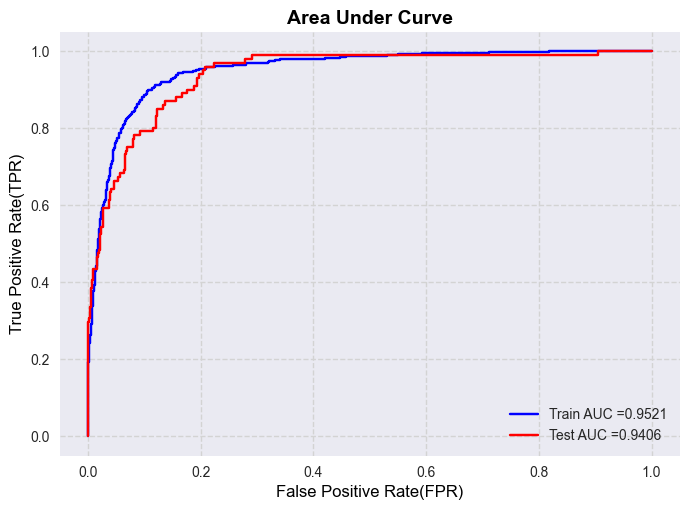

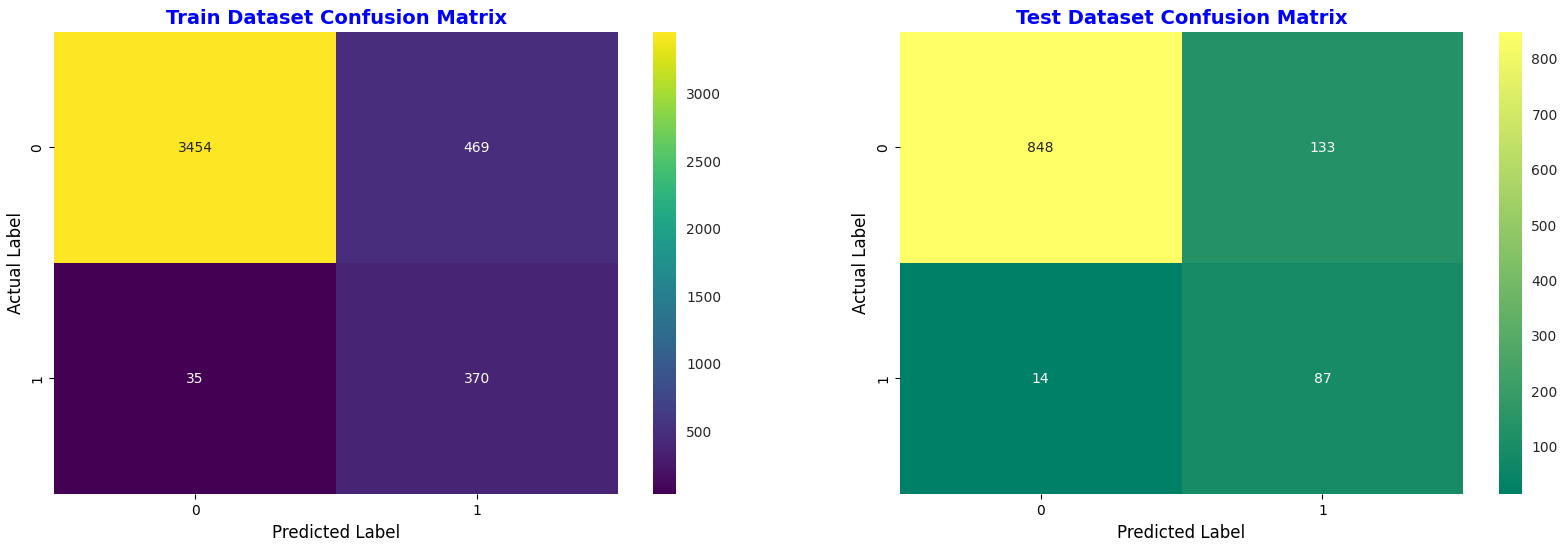



### Best Threshold = 0.3582
### Model AUC is : 0.9406
### Model Train F1 Score is : 0.5949
### Model Test F1 Score is : 0.5421


In [66]:
validate_model(log_reg_1, IF_train_std, IF_test_std, T_train, T_test)

C:\Users\sligh\AppData\Local\Temp\ipykernel_13836\1715830466.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_15_features, x=top_15_features_scores, orient='h', palette='coolwarm')


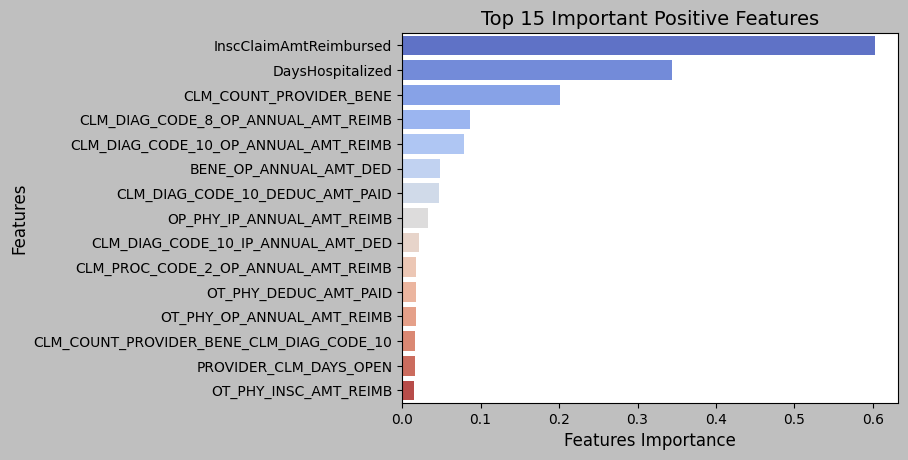

C:\Users\sligh\AppData\Local\Temp\ipykernel_13836\1715830466.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_15_features, x=top_15_features_scores, orient='h', palette='coolwarm')


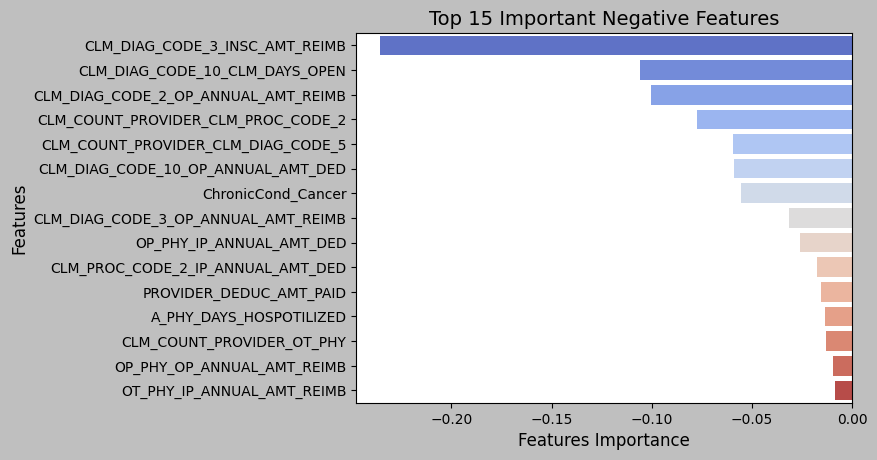

In [67]:
log_reg_important_features = get_important_features(IF_train, log_reg_1, True)
display_top_bot_15_features(log_reg_important_features, bottomfeatures=False)
display_top_bot_15_features(log_reg_important_features, bottomfeatures=True)

## Decision Tree

In [68]:
# Training the model with all features and hyper-parameterized values
dec_tree_2 = DecisionTreeClassifier(criterion='gini',
                                   max_depth= 6,
                                   max_features='log2',
                                   min_samples_leaf=150,
                                   min_samples_split=150,
                                   class_weight='balanced',
                                   random_state=49,
                                   splitter='best',
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

dec_tree_2.fit(IF_train_std, T_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       max_features='log2', min_samples_leaf=150,
                       min_samples_split=150, random_state=49)

### Train AUC = 0.9390482844132262
### Test AUC = 0.9115168397573702


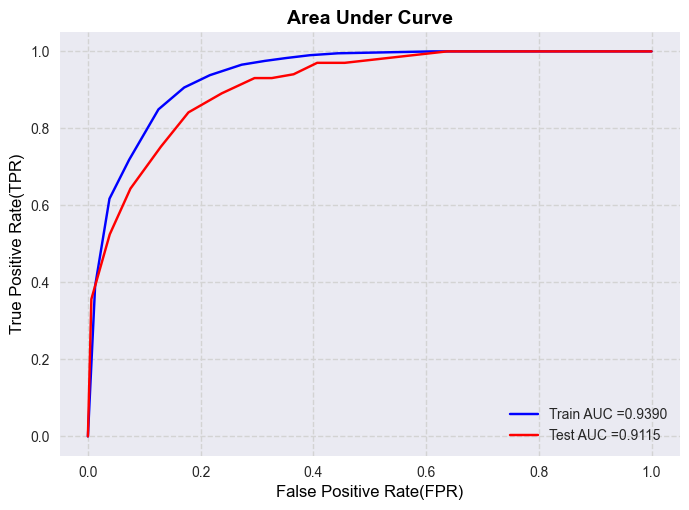

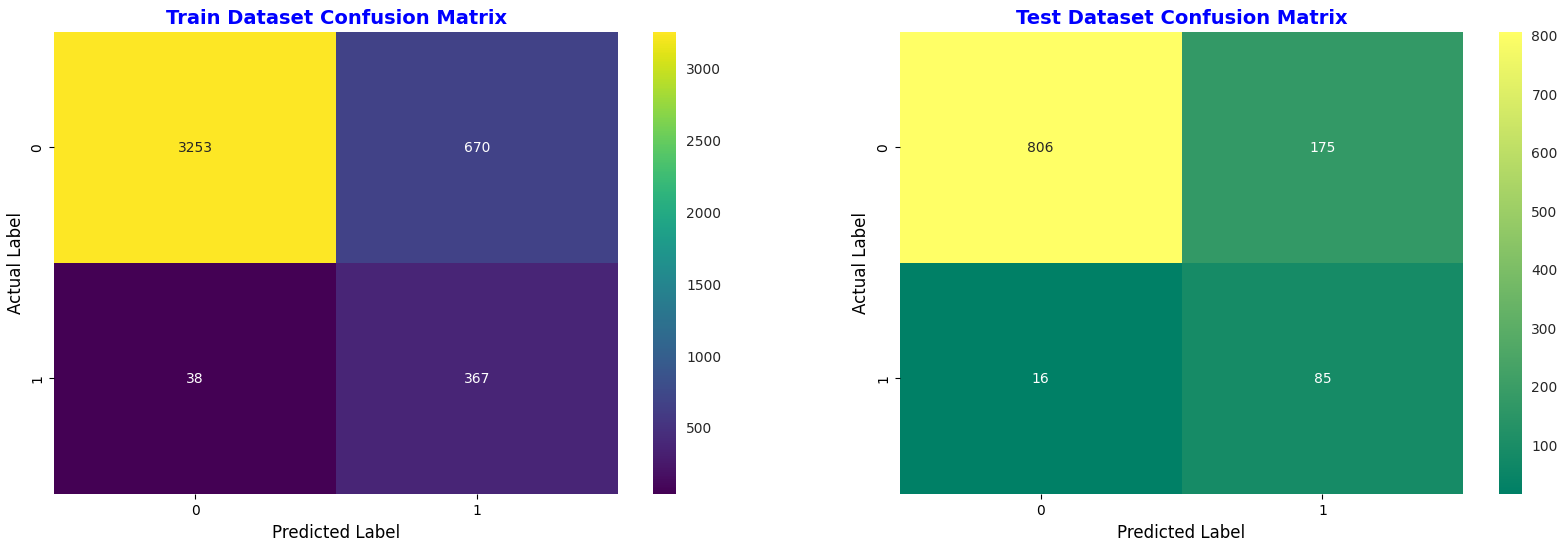



### Best Threshold = 0.5545
### Model AUC is : 0.9115
### Model Train F1 Score is : 0.5090
### Model Test F1 Score is : 0.4709


In [69]:
validate_model(dec_tree_2, IF_train_std, IF_test_std, T_train, T_test)

C:\Users\sligh\AppData\Local\Temp\ipykernel_13836\1715830466.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_15_features, x=top_15_features_scores, orient='h', palette='coolwarm')


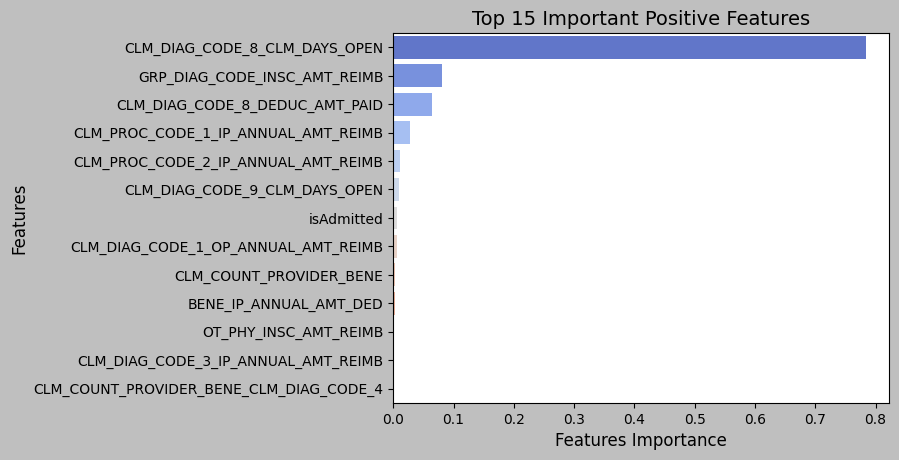

In [70]:
dec_tree_imp_feats = get_important_features(IF_train, dec_tree_2, False)
display_top_bot_15_features(dec_tree_imp_feats, bottomfeatures=False)

## Random Forest

In [71]:
rand_forest_3 = RandomForestClassifier(
                    n_estimators=30,
                    criterion='gini',
                    max_depth=4,
                    max_features='sqrt',
                    min_samples_leaf=50,
                    min_samples_split=50,
                    class_weight='balanced',
                    random_state=49,
                    min_weight_fraction_leaf=0.0,
                    max_leaf_nodes=None,
                    min_impurity_decrease=0.0,
                    ccp_alpha=0.0,
                )

rand_forest_3.fit(IF_train_std, T_train)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=30, random_state=49)

### Train AUC = 0.950589590355076
### Test AUC = 0.9268224987636378


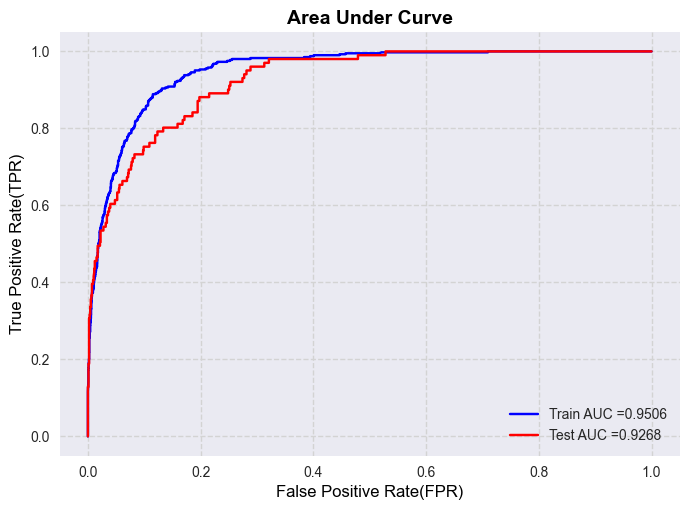

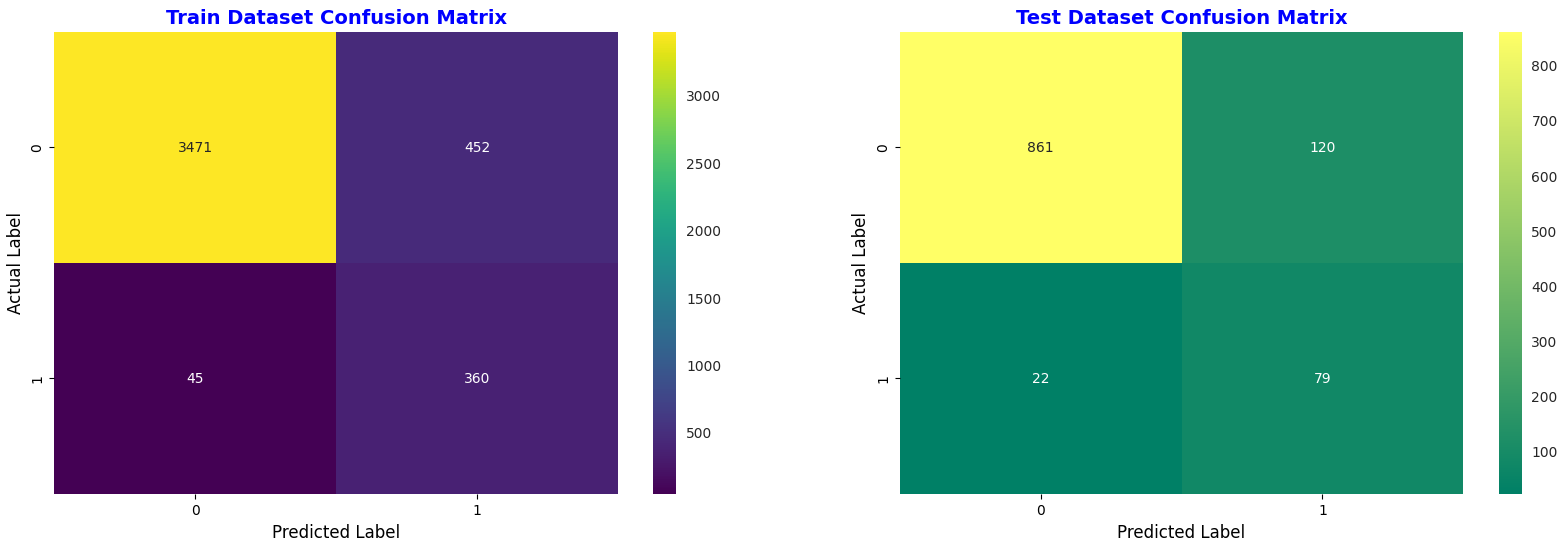



### Best Threshold = 0.5504
### Model AUC is : 0.9268
### Model Train F1 Score is : 0.5916
### Model Test F1 Score is : 0.5267


In [72]:
validate_model(rand_forest_3, IF_train_std, IF_test_std, T_train, T_test)

C:\Users\sligh\AppData\Local\Temp\ipykernel_13836\1715830466.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_15_features, x=top_15_features_scores, orient='h', palette='coolwarm')


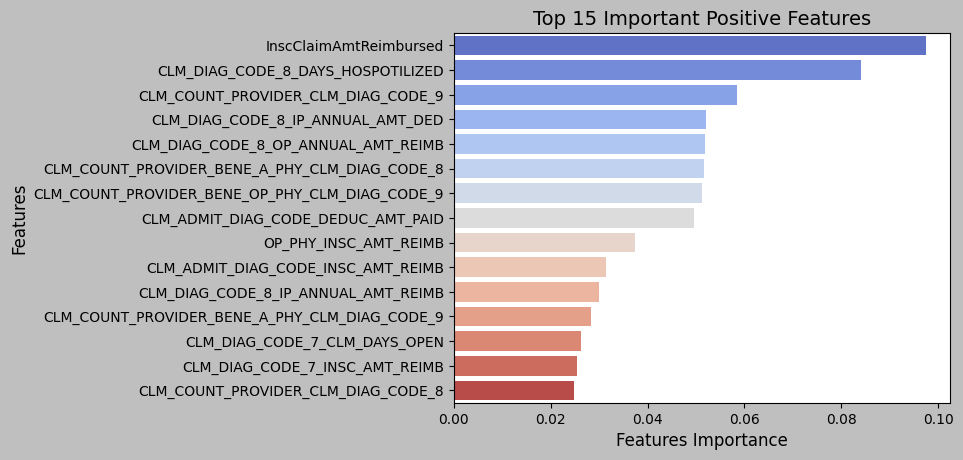

In [73]:
rand_forest_imp_feats = get_important_features(IF_train, rand_forest_3, False)
display_top_bot_15_features(rand_forest_imp_feats, bottomfeatures=False)

## GNN

In [74]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Step 1: Define the graph data
# Node features (e.g., normalized features for providers, claims, etc.)
node_features = torch.tensor([[0.5, 0.1], [0.3, 0.2], [0.6, 0.3]], dtype=torch.float)  # Example features
edge_index = torch.tensor([[0, 1, 2], [1, 2, 0]], dtype=torch.long)  # Directed edges (source, target)
labels = torch.tensor([0, 1, 0], dtype=torch.long)  # Fraudulent (1) or not (0)

# Create a graph data object
data = Data(x=node_features, edge_index=edge_index, y=labels)

# Step 2: Define the GNN model
class GNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Step 3: Initialize and train the model
model = GNN(input_dim=node_features.shape[1], hidden_dim=4, output_dim=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out, data.y)  # Negative log-likelihood loss
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Step 4: Test the model
model.eval()
pred = model(data).argmax(dim=1)
print(f'Predictions: {pred}')


Epoch 0, Loss: 0.6554455161094666
Epoch 20, Loss: 0.6409239172935486
Epoch 40, Loss: 0.6372501850128174
Epoch 60, Loss: 0.6345943808555603
Epoch 80, Loss: 0.6315515637397766
Epoch 100, Loss: 0.6265345215797424
Epoch 120, Loss: 0.6163310408592224
Epoch 140, Loss: 0.5955010056495667
Epoch 160, Loss: 0.5600630640983582
Epoch 180, Loss: 0.5097887516021729
Predictions: tensor([0, 0, 0])


In [75]:
from torch_geometric.data import HeteroData
from torch_geometric.nn import HeteroConv, SAGEConv
import torch.nn.functional as F
import torch

# Step 1: Define a heterogeneous graph
data = HeteroData()

# Add node types and features
data['Provider'].x = torch.randn(5, 16)  # 5 providers with 16 features each
data['Claim'].x = torch.randn(10, 8)    # 10 claims with 8 features each
data['Diagnosis'].x = torch.randn(20, 4)  # 20 diagnoses with 4 features each

# Add edge connections (source, target)
data['Provider', 'USED_DIAGNOSIS', 'Diagnosis'].edge_index = torch.tensor([[0, 1], [1, 2]], dtype=torch.long)
data['Claim', 'HAS_PROVIDER', 'Provider'].edge_index = torch.tensor([[3, 4], [0, 1]], dtype=torch.long)

# Labels for classification (example for providers)
data['Provider'].y = torch.tensor([0, 1, 0, 1, 0], dtype=torch.long)

# Step 2: Define a heterogeneous GNN
class HeteroGNN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.convs = HeteroConv({
            ('Provider', 'USED_DIAGNOSIS', 'Diagnosis'): SAGEConv((-1, -1), hidden_channels),
            ('Claim', 'HAS_PROVIDER', 'Provider'): SAGEConv((-1, -1), hidden_channels)
        })
        self.linear = torch.nn.Linear(hidden_channels, 2)  # Output layer for binary classification

    def forward(self, data):
        x_dict = self.convs(data.x_dict, data.edge_index_dict)
        x_provider = x_dict['Provider']  # Get the embeddings for 'Provider' nodes
        return F.log_softmax(self.linear(x_provider), dim=1)

# Step 3: Initialize and train the model
model = HeteroGNN(hidden_channels=32)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out, data['Provider'].y)  # Supervised training on provider nodes
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Step 4: Test the model
model.eval()
pred = model(data).argmax(dim=1)
print(f'Predictions for Providers: {pred}')

Epoch 0, Loss: 0.7456420660018921
Epoch 10, Loss: 0.013348406180739403
Epoch 20, Loss: 0.00045127380872145295
Epoch 30, Loss: 8.403621905017644e-05
Epoch 40, Loss: 4.069660644745454e-05
Epoch 50, Loss: 3.0111481464700773e-05
Epoch 60, Loss: 2.6487698050914332e-05
Epoch 70, Loss: 2.4985729396576062e-05
Epoch 80, Loss: 2.4198980099754408e-05
Epoch 90, Loss: 2.36506402870873e-05
Predictions for Providers: tensor([0, 1, 0, 1, 0])


C:\Users\sligh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch_geometric\nn\conv\hetero_conv.py:76: UserWarning: There exist node types ({'Claim'}) whose representations do not get updated during message passing as they do not occur as destination type in any edge type. This may lead to unexpected behavior.
  warnings.warn(


In [78]:
import torch
from torch_geometric.data import HeteroData
from torch_geometric.nn import HeteroConv, Linear, MessagePassing
from torch_geometric.nn.models import GAT

# Step 1: Create the Heterogeneous Graph Data
data = HeteroData()

# Add node features
data['Provider'].x = torch.rand(100, 8)  # Example: 100 Provider nodes with 8 features each
data['Diagnosis'].x = torch.rand(200, 4)  # Example: 200 Diagnosis nodes with 4 features each

# Add edges with features
data['Provider', 'USED_DIAGNOSIS', 'Diagnosis'].edge_index = torch.randint(0, 100, (2, 500))  # 500 edges
data['Provider', 'USED_DIAGNOSIS', 'Diagnosis'].edge_attr = torch.rand(500, 3)  # 3 features per edge

data['Diagnosis', 'IS_PART_OF', 'Provider'].edge_index = torch.randint(0, 100, (2, 300))  # 300 edges
data['Diagnosis', 'IS_PART_OF', 'Provider'].edge_attr = torch.rand(300, 2)  # 2 features per edge

# Step 2: Define the Heterogeneous GNN
class HeteroGNN(torch.nn.Module):
    def __init__(self, hidden_dim, out_dim):
        super().__init__()
        
        # Linear transformations for node features
        self.node_encoder = torch.nn.ModuleDict({
            'Provider': Linear(8, hidden_dim),
            'Diagnosis': Linear(4, hidden_dim),
        })
        
        # Linear transformations for edge features
        self.edge_encoder = torch.nn.ModuleDict({
            ('Provider', 'USED_DIAGNOSIS', 'Diagnosis'): Linear(3, hidden_dim),
            ('Diagnosis', 'IS_PART_OF', 'Provider'): Linear(2, hidden_dim),
        })
        
        # Heterogeneous convolution
        self.conv1 = HeteroConv({
            ('Provider', 'USED_DIAGNOSIS', 'Diagnosis'): GAT(hidden_dim, hidden_dim),
            ('Diagnosis', 'IS_PART_OF', 'Provider'): GAT(hidden_dim, hidden_dim),
        })
        
        self.conv2 = HeteroConv({
            ('Provider', 'USED_DIAGNOSIS', 'Diagnosis'): GAT(hidden_dim, out_dim),
            ('Diagnosis', 'IS_PART_OF', 'Provider'): GAT(hidden_dim, out_dim),
        })

    def forward(self, data):
        x_dict = {node_type: self.node_encoder[node_type](data[node_type].x) for node_type in data.node_types}
        
        edge_attr_dict = {
            edge_type: self.edge_encoder[edge_type](data[edge_type].edge_attr)
            for edge_type in data.edge_types
        }
        
        # First layer of heterogeneous convolution
        x_dict = self.conv1(x_dict, data.edge_index_dict, edge_attr_dict)
        x_dict = {key: x.relu() for key, x in x_dict.items()}
        
        # Second layer of heterogeneous convolution
        x_dict = self.conv2(x_dict, data.edge_index_dict, edge_attr_dict)
        return x_dict

# Step 3: Initialize and Train the Model
model = HeteroGNN(hidden_dim=16, out_dim=2)  # Hidden dimensions 16, output dimensions 2

# Example input
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Forward pass
output = model(data)
provider_output = output['Provider']  # Get the output for the 'Provider' node type

# Example: Dummy labels for training
labels = torch.randint(0, 2, (100,))
loss = criterion(provider_output, labels)
loss.backward()
optimizer.step()

TypeError: module name should be a string. Got tuple

In [77]:
class HeteroGNN(torch.nn.Module):
    def __init__(self, hidden_dim, out_dim):
        super().__init__()
        
        # Linear transformations for node features
        self.node_encoder = torch.nn.ModuleDict({
            'Provider': Linear(8, hidden_dim),
            'Diagnosis': Linear(4, hidden_dim),
        })
        
        # Linear transformations for edge features
        self.edge_encoder = torch.nn.ModuleDict({
            'USED_DIAGNOSIS': Linear(3, hidden_dim),
            'IS_PART_OF': Linear(2, hidden_dim),
        })
        
        # Heterogeneous convolution
        self.conv1 = HeteroConv({
            'USED_DIAGNOSIS': GAT(hidden_dim, hidden_dim),
            'IS_PART_OF': GAT(hidden_dim, hidden_dim),
        })
        
        self.conv2 = HeteroConv({
            'USED_DIAGNOSIS': GAT(hidden_dim, out_dim),
            'IS_PART_OF': GAT(hidden_dim, out_dim),
        })

    def forward(self, data):
        # Encode node features
        x_dict = {node_type: self.node_encoder[node_type](data[node_type].x) for node_type in data.node_types}
        
        # Encode edge features
        edge_attr_dict = {
            edge_type: self.edge_encoder[edge_type](data[edge_type].edge_attr)
            for edge_type in data.edge_types
        }
        
        # First layer of heterogeneous convolution
        x_dict = self.conv1(x_dict, data.edge_index_dict, edge_attr_dict)
        x_dict = {key: x.relu() for key, x in x_dict.items()}
        
        # Second layer of heterogeneous convolution
        x_dict = self.conv2(x_dict, data.edge_index_dict, edge_attr_dict)
        return x_dict

# Initialize and Train the Model
model = HeteroGNN(hidden_dim=16, out_dim=2)


TypeError: BasicGNN.__init__() missing 1 required positional argument: 'num_layers'

In [ ]:
//https://www.nature.com/articles/s41598-023-44224-1